In [ ]:
!pip install catboost

#Importing Essential Libraries

In [2]:
import pandas as pd
import numpy as np

# Importing visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,ExtraTreesClassifier,StackingClassifier, HistGradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, KBinsDiscretizer, RobustScaler
from sklearn.model_selection import KFold,StratifiedKFold, GroupKFold,train_test_split
import gc
import datetime
from tqdm.notebook import tqdm ,tnrange
import warnings

# Importing model building packages
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn import preprocessing,metrics 
from sklearn.preprocessing import LabelEncoder,StandardScaler,KBinsDiscretizer

from tqdm.notebook import tqdm
from copy import deepcopy

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import lightgbm as lgb

import optuna
from optuna import Trial, visualization

from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score, mean_squared_error

import warnings
warnings.filterwarnings("ignore")

# Loading data into pandas dataframe and print details of data

In [3]:
train_raw   = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/Train.csv')
test_raw    = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/Test.csv')
sub         = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/sample submission.csv')

In [4]:
train_raw.head(5)

EmpID  EmpName  ... BiasInfluentialFactor  FitmentPercent
0  11041     John  ...      YearsOfExperince           95.40
1  15079  William  ...                   NaN           67.09
2  18638    James  ...                Gender           91.26
3   3941  Charles  ...                Gender           72.29
4   5936   George  ...          DegreeBranch           86.34

[5 rows x 22 columns]

In [5]:
test_raw.head(5)

EmpID  EmpName  ... DepartmentInCompany  TotalLeavesTaken
0   5664     Theo  ...             Finance                18
1  23568   Vernie  ...         Engineering                 8
2  21490  Wendell  ...         Engineering                18
3   8363     West  ...             Product                17
4   6165   Alford  ...         Engineering                 9

[5 rows x 20 columns]

# describe the data

In [6]:
train_raw.describe().T

count          mean  ...       75%      max
EmpID             13645.0  13150.781239  ...  18718.00  24390.0
Age               13645.0     30.691242  ...     34.00     42.0
LatestDegreeCGPA  13645.0      7.100257  ...      8.00     10.0
YearsOfExperince  13645.0      6.547746  ...      9.00     12.0
GraduationYear    13645.0   2014.452254  ...   2017.00   2020.0
CurrentCTC        13645.0     18.076951  ...     24.00     30.0
ExpectedCTC       13645.0     25.061488  ...     31.00     40.0
EmpScore          13645.0      3.392085  ...      4.00      5.0
TotalLeavesTaken  13645.0     11.967021  ...     16.00     20.0
FitmentPercent    13645.0     75.880093  ...     87.99     95.5

[10 rows x 8 columns]

# info of the data

In [7]:
#observe the different feature type present in the data
print(train_raw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13645 entries, 0 to 13644
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmpID                    13645 non-null  int64  
 1   EmpName                  13645 non-null  object 
 2   LanguageOfCommunication  13645 non-null  object 
 3   Age                      13645 non-null  int64  
 4   Gender                   13645 non-null  object 
 5   JobProfileIDApplyingFor  13645 non-null  object 
 6   HighestDegree            13645 non-null  object 
 7   DegreeBranch             13645 non-null  object 
 8   GraduatingInstitute      13645 non-null  object 
 9   LatestDegreeCGPA         13645 non-null  int64  
 10  YearsOfExperince         13645 non-null  int64  
 11  GraduationYear           13645 non-null  int64  
 12  CurrentCTC               13645 non-null  int64  
 13  ExpectedCTC              13645 non-null  int64  
 14  MartialStatus         

We have got 12 object type and 10 numeric type data

# Categorical Feature Distribution

In [8]:
train_raw.drop(['EmpID'], axis=1, inplace=True) #dropping id col
features                = train_raw.columns.values
categorical_features    = train_raw.select_dtypes(include='object').columns.tolist() #list of only cat features excluding empname
numerical_features      = train_raw.select_dtypes(include=np.number).columns.tolist()  #list of only num features

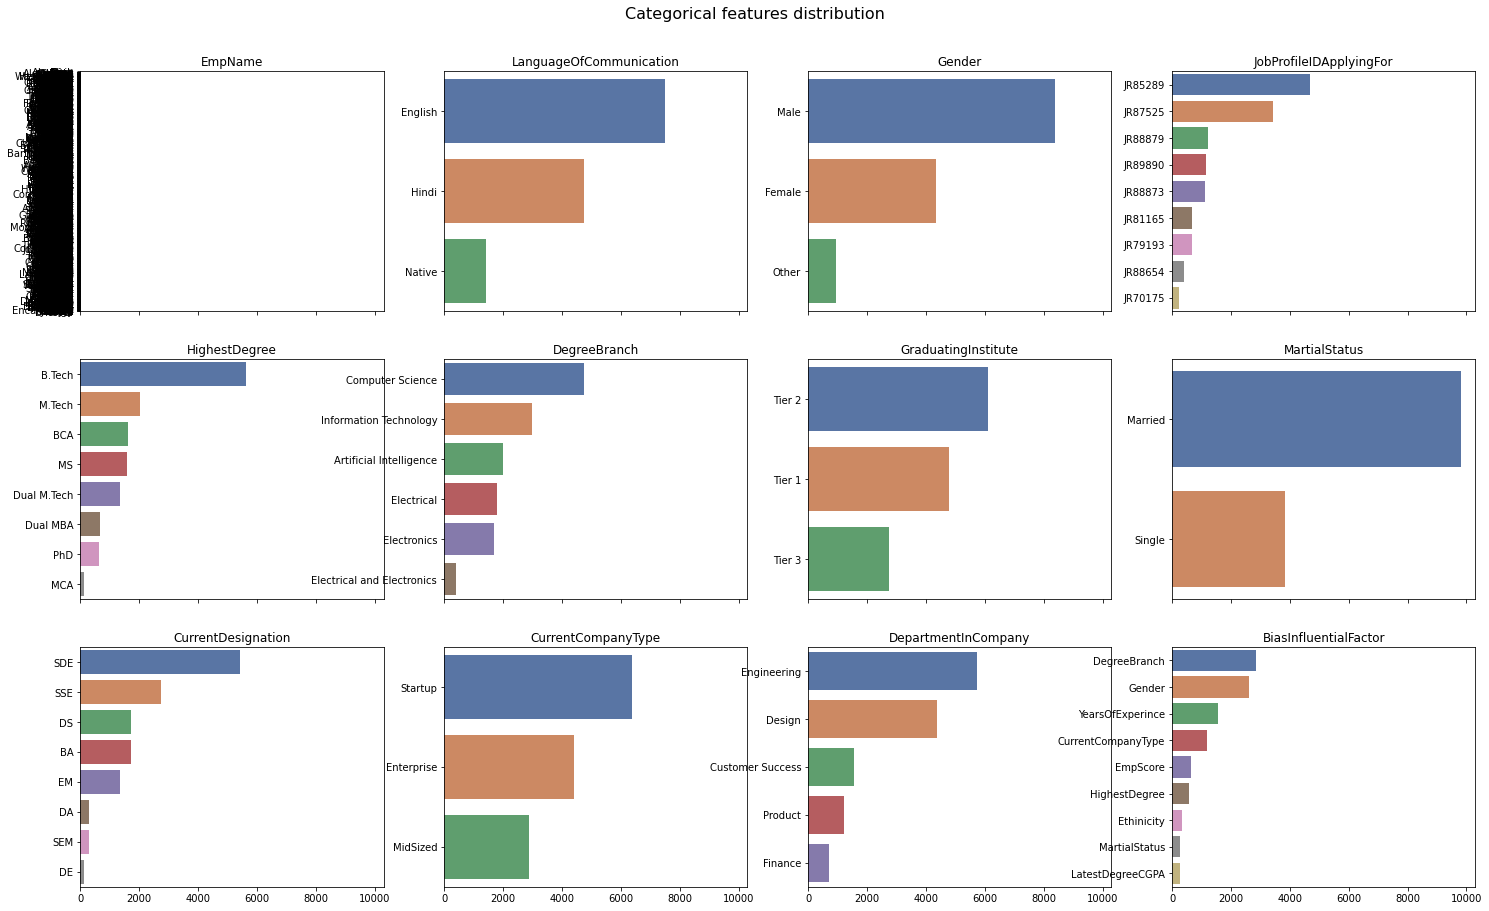

In [9]:
idx = 0
f, axes = plt.subplots(3, 4, sharex=True, figsize=(25,15))
plt.suptitle('Categorical features distribution', size=16, y=(0.94))

for row in range(3):
    for col in range(4):
        data = train_raw[categorical_features[idx]].value_counts()
        sns.barplot(x = data.values, y = data.index, palette='deep', ax=axes[row, col])
        axes[row,col].set_title(categorical_features[idx])
        idx += 1

# Numeric Data Distribtion

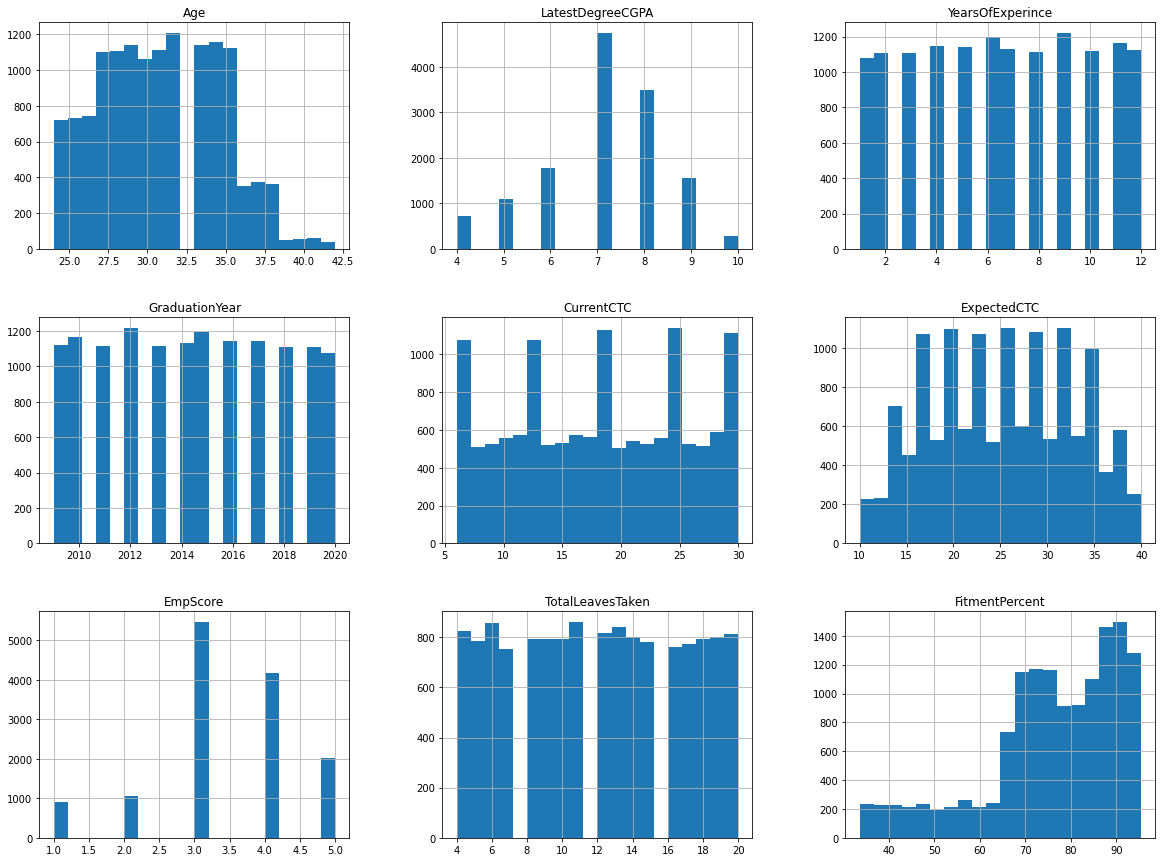

In [10]:
train_raw.hist(bins=20, figsize=(20, 15))
plt.show()

# Getting prepare for the Classifiaction

## EDA (Exproratory Data Analysis)

In [11]:
# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

import random
import plotly
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
init_notebook_mode(connected=True)
import plotly.offline as offline
import plotly.graph_objs as go

In [12]:
sns.set_palette("coolwarm", 8, .75)

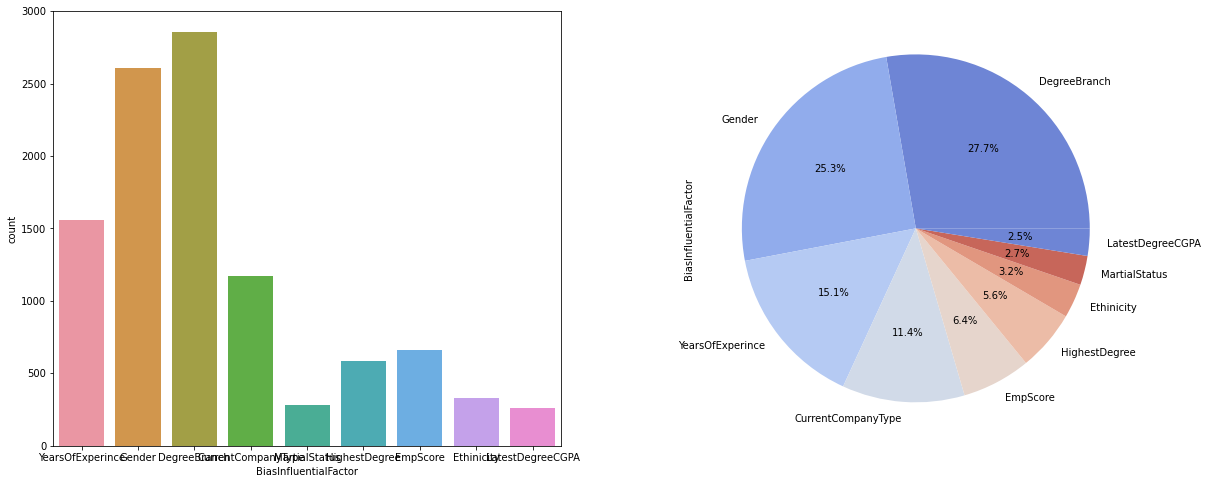

In [13]:
fig, ax=plt.subplots(1,2,figsize=(20,8))
_ = sns.countplot(x='BiasInfluentialFactor', data=train_raw, ax=ax[0])
_ = train_raw['BiasInfluentialFactor'].value_counts().plot.pie(autopct="%1.1f%%", ax=ax[1])

**Gender** and **DegreeBranch**	have the highest share in Bias Influential factor

<Figure size 432x288 with 0 Axes>

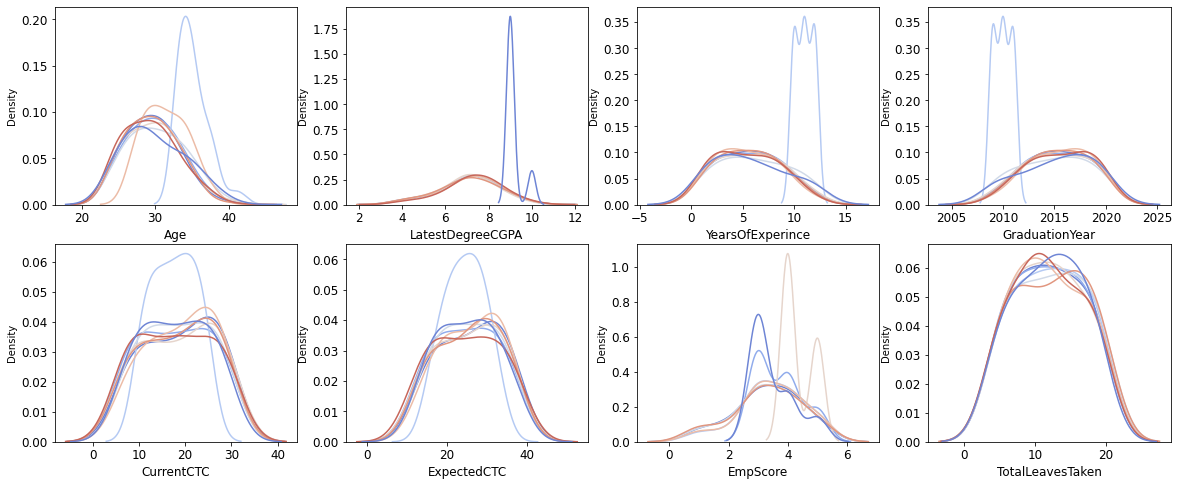

In [14]:
# Plotting numerical variable in displot to visualise the distribution
num = train_raw.select_dtypes(include='number')
numerical_features = list(num.columns.values)
# dropping Class columns from the list
numerical_features.remove("FitmentPercent")

i = 0
a = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'DegreeBranch']
b = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'Gender']
c = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'YearsOfExperince']
d = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'CurrentCompanyType']
e = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'EmpScore']
f = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'HighestDegree']
g = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'Ethinicity']
h = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'MartialStatus']
u = train_raw.loc[train_raw['BiasInfluentialFactor'] == 'LatestDegreeCGPA']

plt.figure()
fig, ax = plt.subplots(2,4,figsize=(20,8))

for feature in numerical_features:
    i += 1
    plt.subplot(2,4,i)
    sns.kdeplot(a[feature], bw=0.5, label="DegreeBranch")
    sns.kdeplot(b[feature], bw=0.5, label="Gender")
    sns.kdeplot(c[feature], bw=0.5, label="YearsOfExperince")
    sns.kdeplot(d[feature], bw=0.5, label="CurrentCompanyType")
    sns.kdeplot(e[feature], bw=0.5, label="EmpScore")
    sns.kdeplot(f[feature], bw=0.5, label="HighestDegree")
    sns.kdeplot(g[feature], bw=0.5, label="Ethinicity")
    sns.kdeplot(h[feature], bw=0.5, label="MartialStatus")
    sns.kdeplot(u[feature], bw=0.5, label="LatestDegreeCGPA")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

There are slightly good feature beacause they are splitting well.. Except TotalLeavesTaken

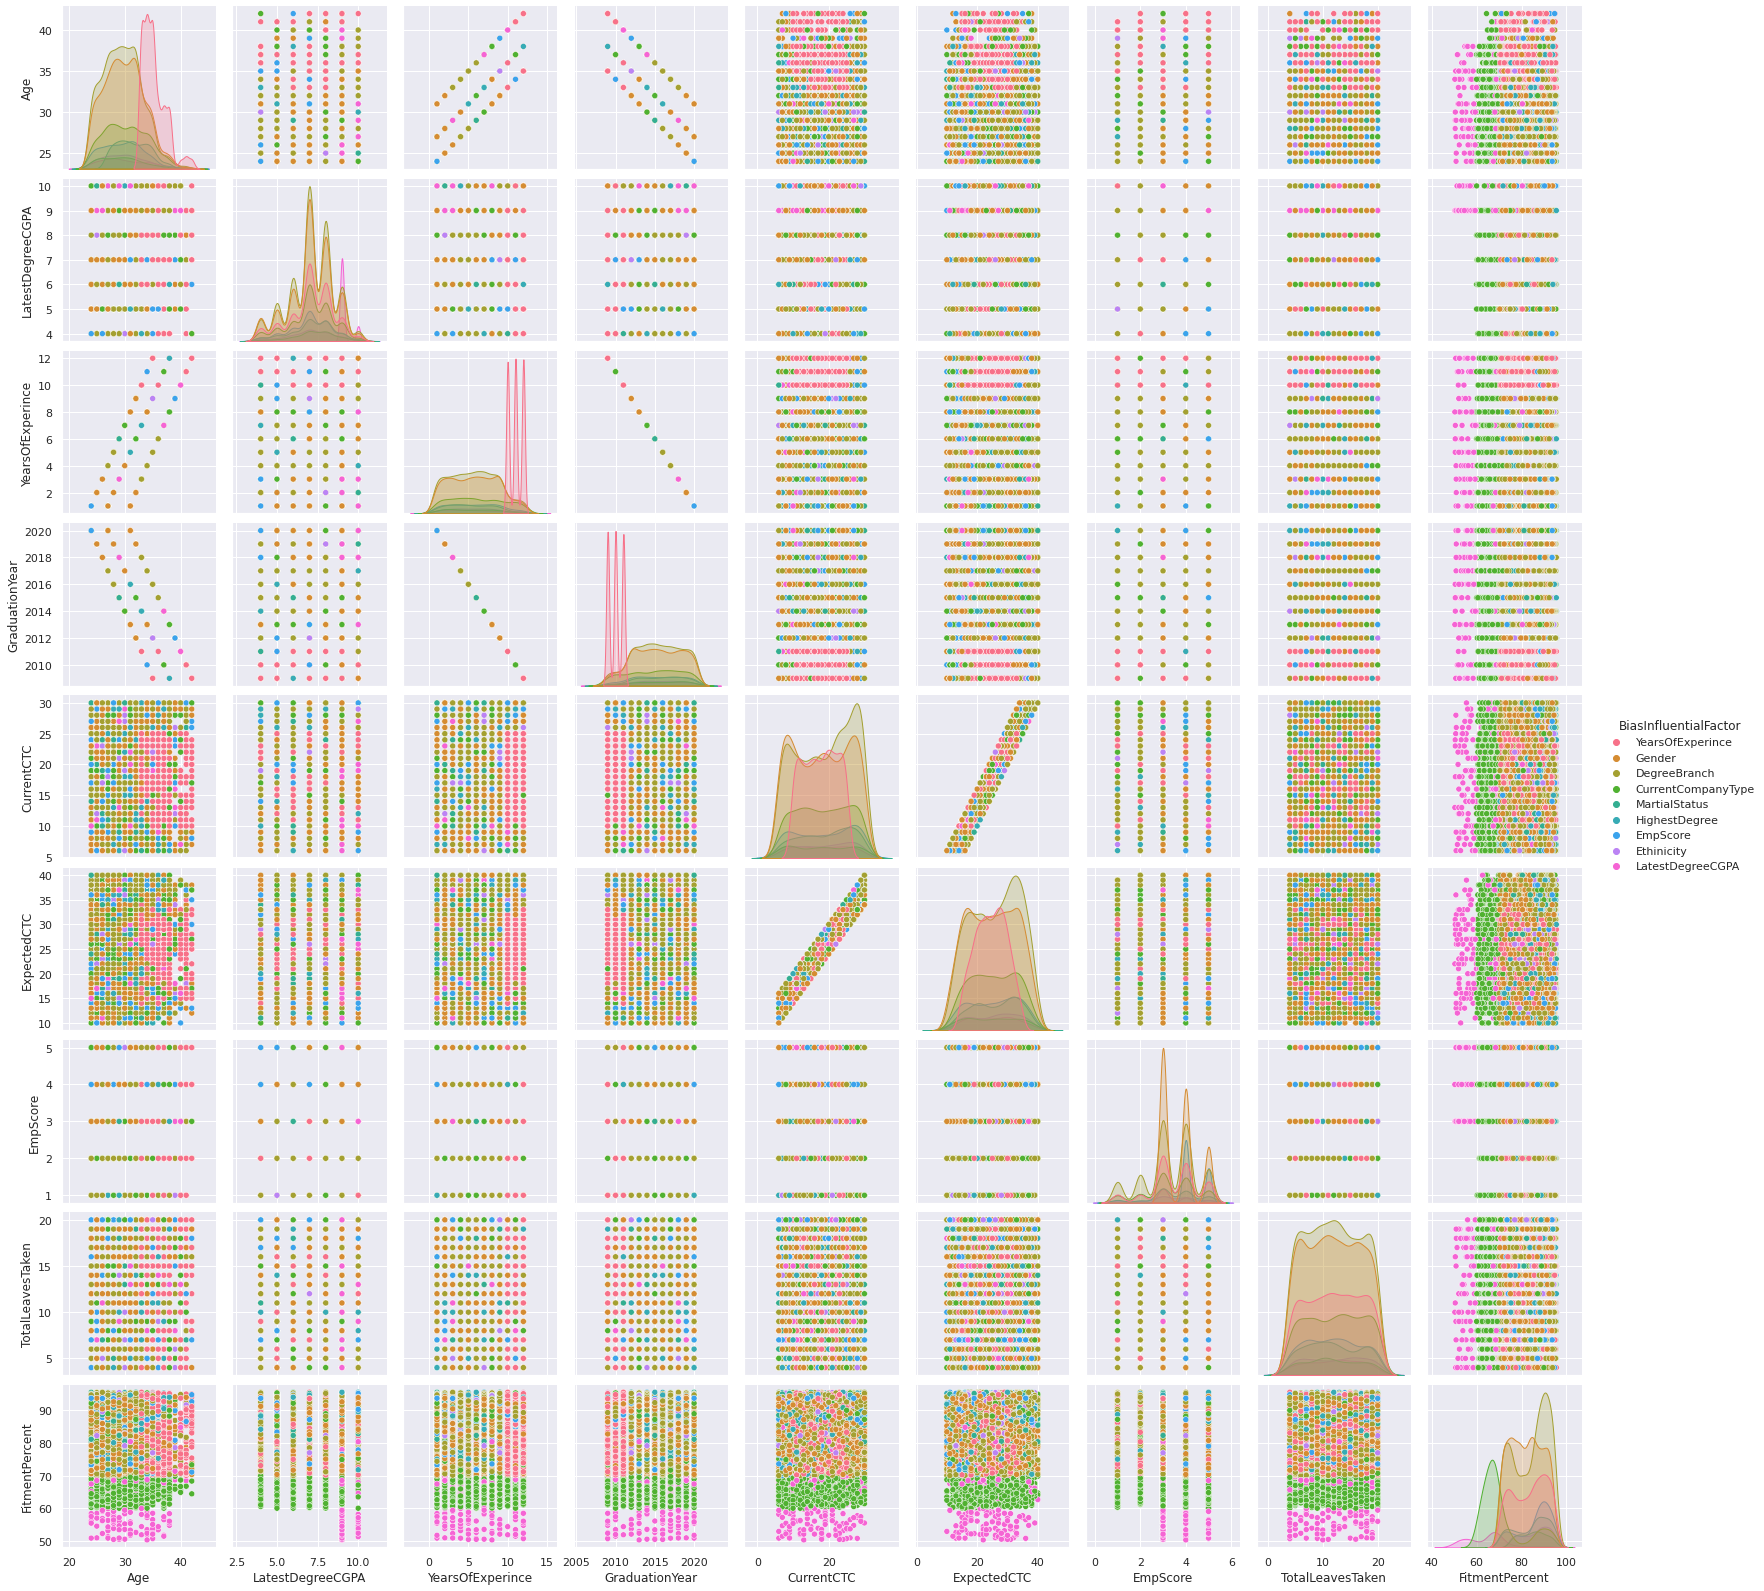

In [ ]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
sns.pairplot(train_raw, hue="BiasInfluentialFactor")

## Encoding Categorical Features

In [15]:
#Data encoding
train_raw['LanguageOfCommunication']         = train_raw['LanguageOfCommunication'].replace({'English':0,'Hindi':1, 'Native':2})
train_raw["Gender"]                          = train_raw["Gender"].replace({"Male":0,"Female":1,"Other":2})
train_raw["JobProfileIDApplyingFor"]         = train_raw["JobProfileIDApplyingFor"].apply(lambda x:x[2:])
train_raw["HighestDegree"]                   = train_raw["HighestDegree"].replace({"B.Tech":1, "M.Tech":2, "BCA":3, "MS":4, "Dual M.Tech":5,"Dual MBA":6,"PhD":7,"MCA":8})
train_raw["DegreeBranch"]                    = train_raw["DegreeBranch"].replace({'Computer Science':1,
                                                                                  'Information Technology':2, 
                                                                                  'Artificial Intelligence':3,
                                                                                  'Electrical':4,
                                                                                  'Electronics':5,
                                                                                  'Electrical and Electronics':6})

train_raw["GraduatingInstitute"]             = train_raw["GraduatingInstitute"].apply(lambda x:x[5:])
train_raw["MartialStatus"]                   = train_raw["MartialStatus"].replace({'Married':1,'Single':2})

train_raw["CurrentDesignation"]              = train_raw["CurrentDesignation"].replace({'SDE':1,
                                                                                  'SSE':2, 
                                                                                  'DS':3,
                                                                                  'BA':4,
                                                                                  'EM':5,
                                                                                  'DA':6,
                                                                                  'SEM':7,
                                                                                  'DE':8})
train_raw['CurrentCompanyType']         = train_raw['CurrentCompanyType'].replace({'Startup':0,'Enterprise':1, 'MidSized':2})
train_raw["DepartmentInCompany"]        = train_raw["DepartmentInCompany"].replace({"Engineering":1, 
                                                                                          "Design":2, 
                                                                                          "Customer Success":3, 
                                                                                          "Product":4, 
                                                                                          "Finance":5})
train_raw["BiasInfluentialFactor"]      = train_raw["BiasInfluentialFactor"].replace({'DegreeBranch':1,
                                                                                  'Gender':2, 
                                                                                  'YearsOfExperince':3,
                                                                                  'CurrentCompanyType':4,
                                                                                  'EmpScore':5,
                                                                                  'HighestDegree':6,
                                                                                  'Ethinicity':7,
                                                                                  'MartialStatus':8,
                                                                                  'LatestDegreeCGPA':9})
train_raw

EmpName  LanguageOfCommunication  ...  BiasInfluentialFactor  FitmentPercent
0         John                        0  ...                    3.0           95.40
1      William                        0  ...                    NaN           67.09
2        James                        0  ...                    2.0           91.26
3      Charles                        0  ...                    2.0           72.29
4       George                        0  ...                    1.0           86.34
...        ...                      ...  ...                    ...             ...
13640   Perley                        0  ...                    2.0           93.65
13641  Randall                        2  ...                    NaN           52.90
13642  Raphael                        1  ...                    4.0           61.46
13643     Reed                        1  ...                    5.0           93.64
13644   Shelby                        0  ...                    3.0           93.52

[13645 rows x 21 columns]

In [16]:
train_raw["LanguageOfCommunication"]      = pd.to_numeric(train_raw["LanguageOfCommunication"])
train_raw["Gender"]                       = pd.to_numeric(train_raw["Gender"])
train_raw["JobProfileIDApplyingFor"]      = pd.to_numeric(train_raw["JobProfileIDApplyingFor"])
train_raw["HighestDegree"]                = pd.to_numeric(train_raw["HighestDegree"])
train_raw["DegreeBranch"]                 = pd.to_numeric(train_raw["DegreeBranch"])
train_raw["GraduatingInstitute"]          = pd.to_numeric(train_raw["GraduatingInstitute"])
train_raw["MartialStatus"]                = pd.to_numeric(train_raw["MartialStatus"])
train_raw["CurrentDesignation"]           = pd.to_numeric(train_raw["CurrentDesignation"])
train_raw["CurrentCompanyType"]           = pd.to_numeric(train_raw["CurrentCompanyType"])
train_raw["DepartmentInCompany"]          = pd.to_numeric(train_raw["DepartmentInCompany"])
train_raw["BiasInfluentialFactor"]        = pd.to_numeric(train_raw["BiasInfluentialFactor"])

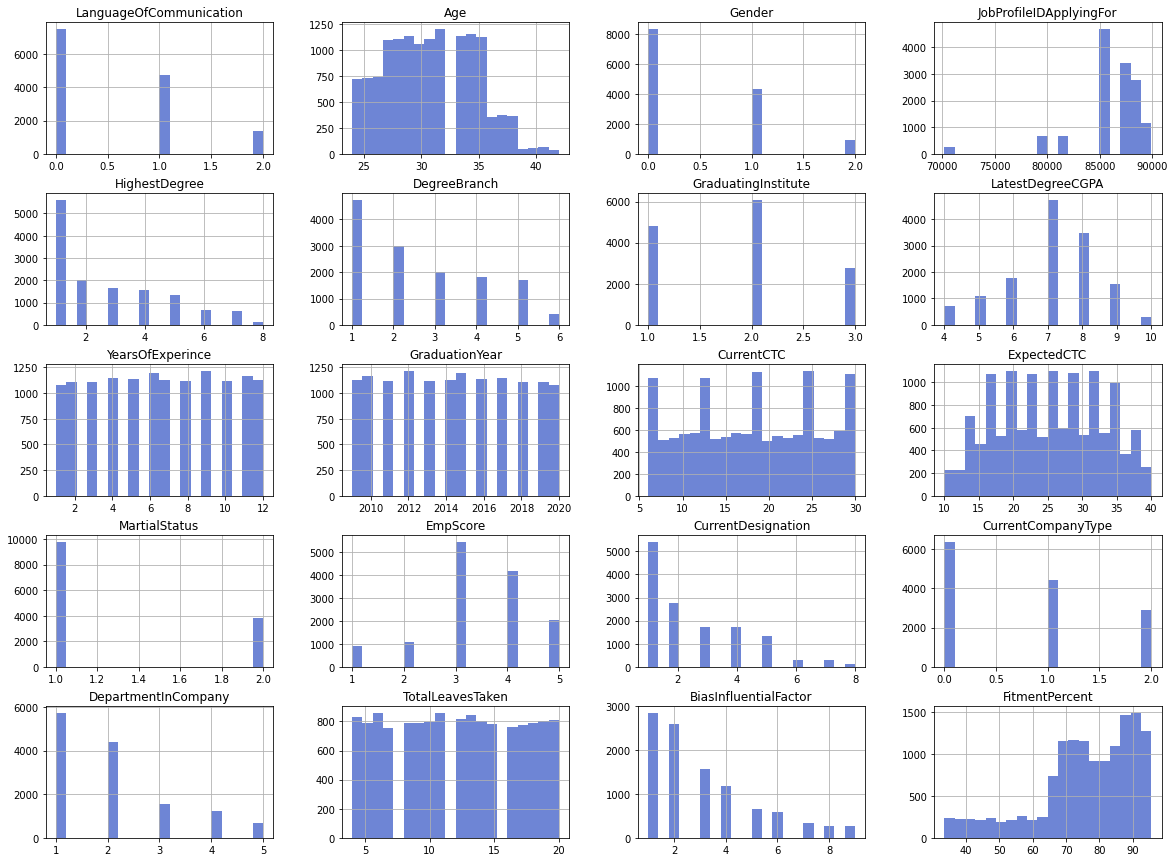

In [17]:
train_raw.hist(bins=20, figsize=(20, 15))
plt.show()

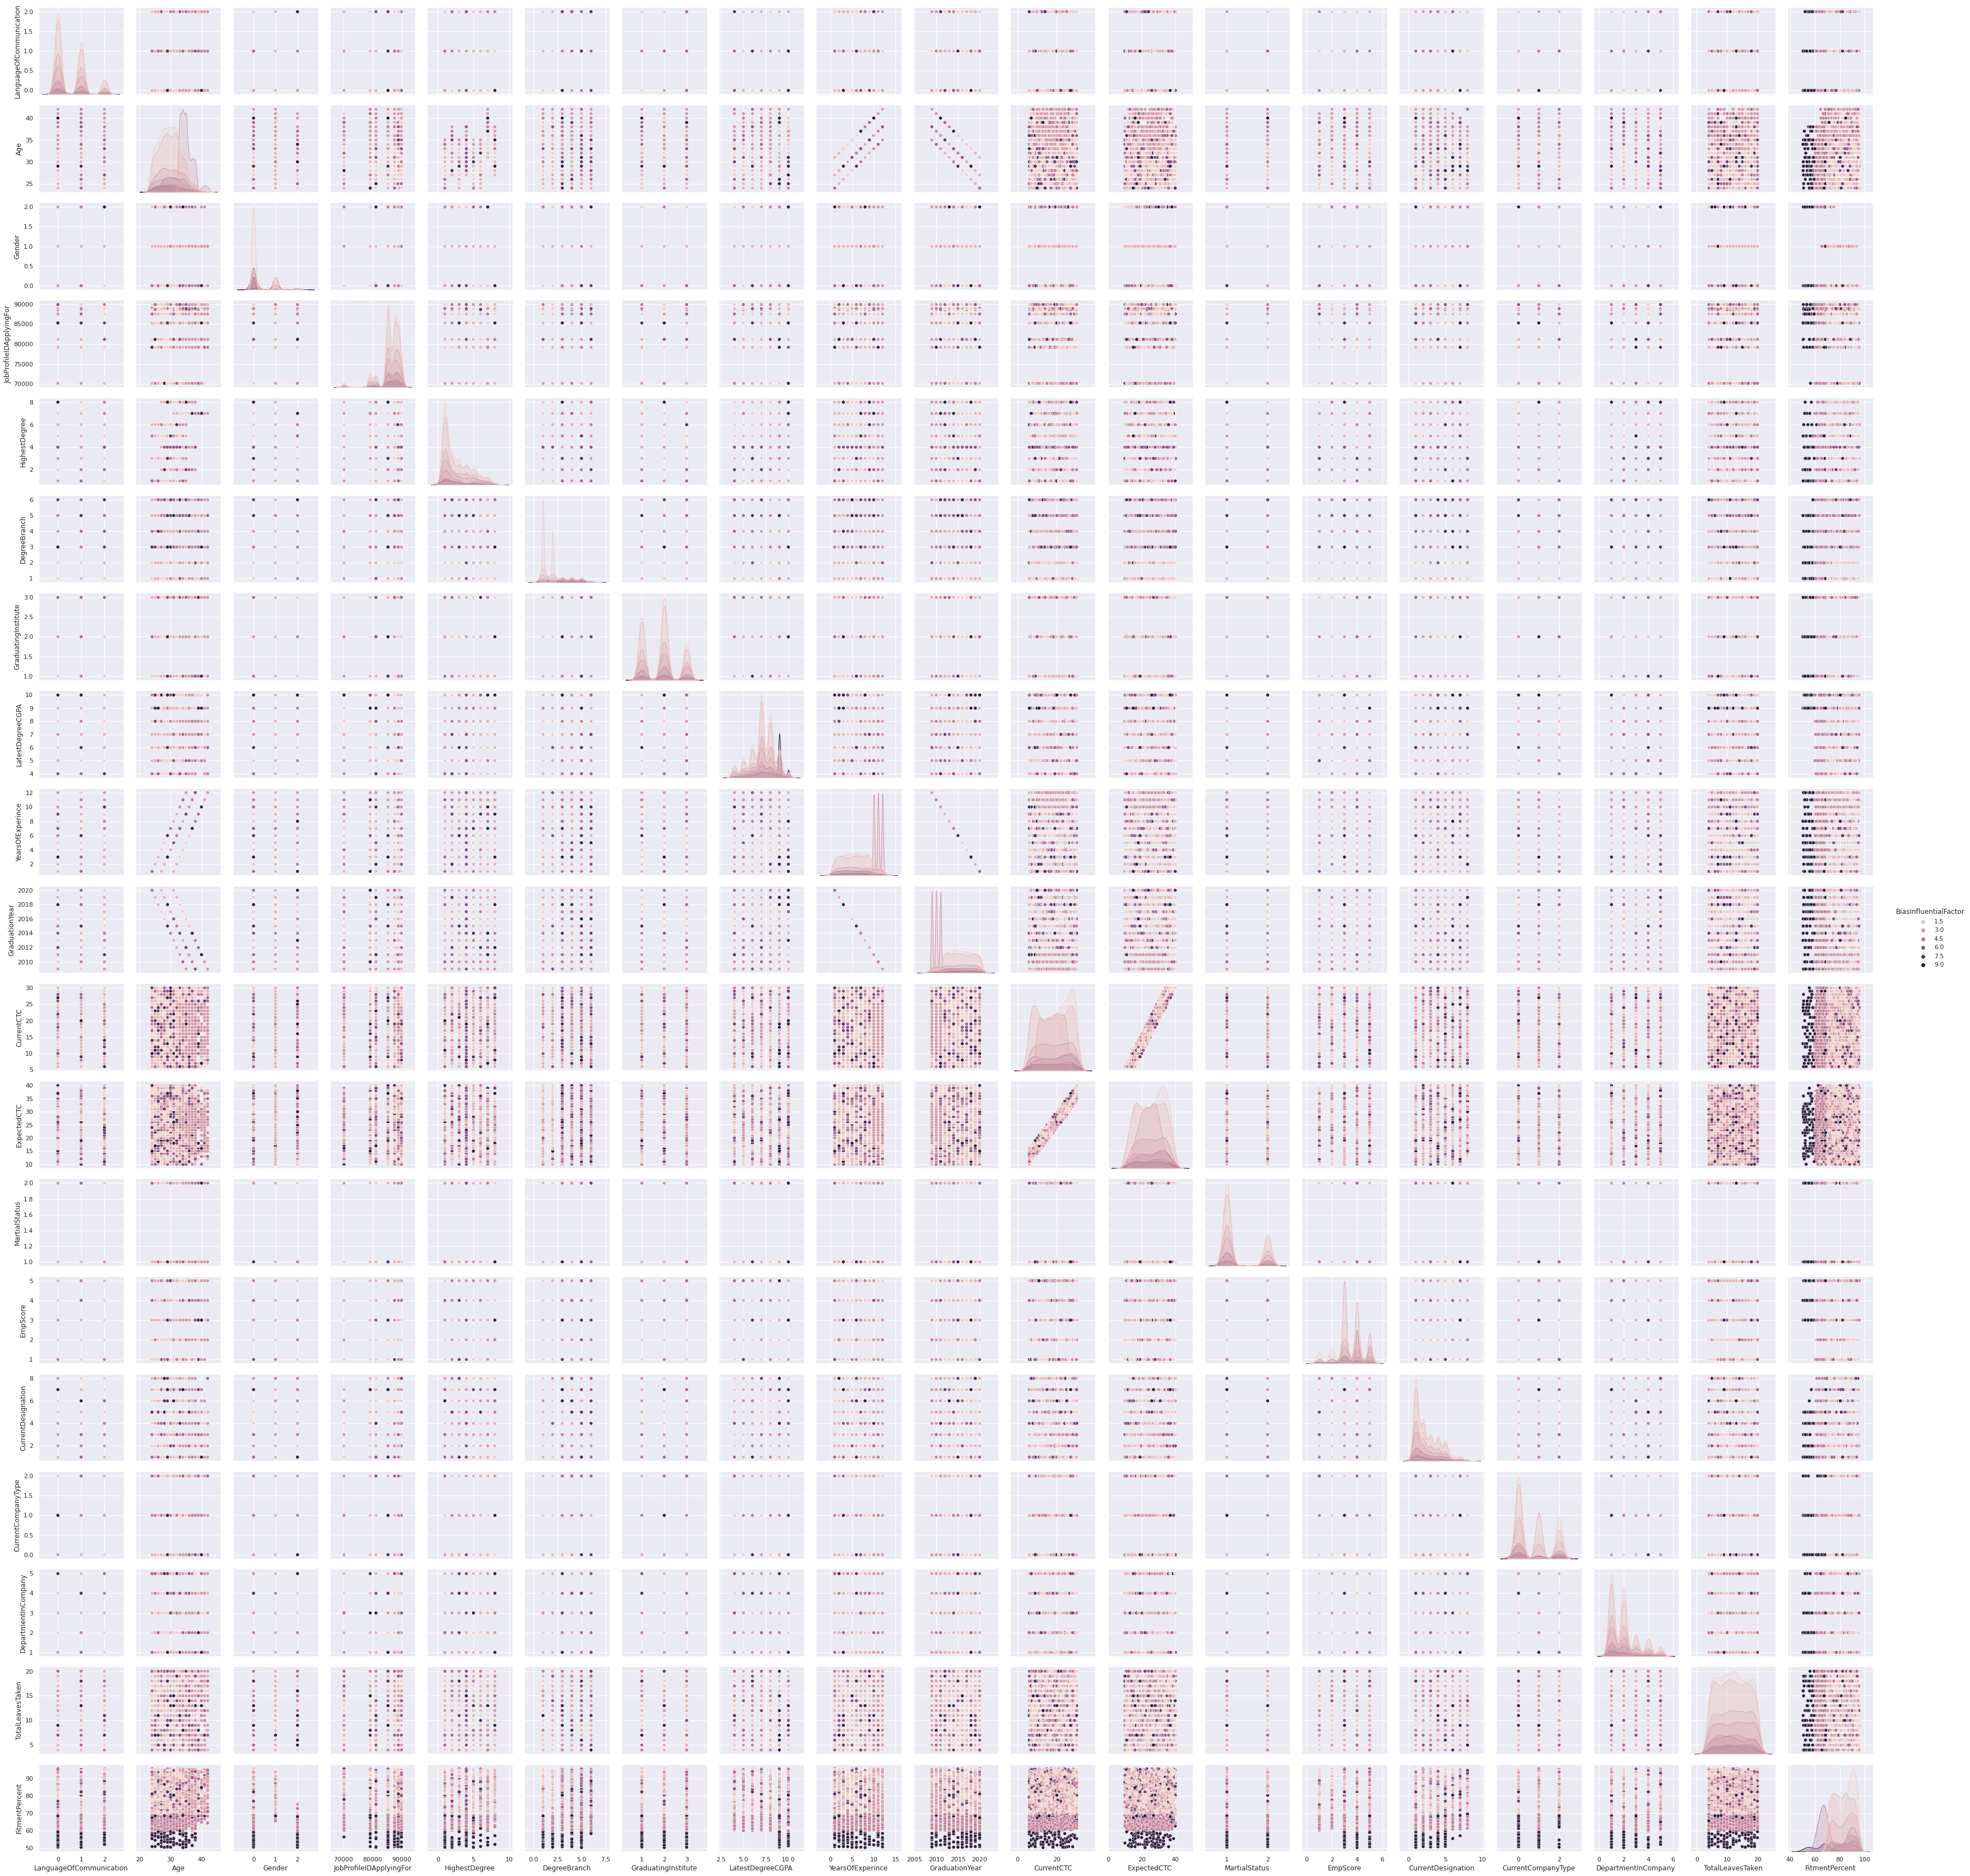

In [ ]:
# Using seaborn pairplot to see the bivariate relation between each pair of features
# sns.pairplot(train_raw, hue="BiasInfluentialFactor")

## Handling missing Values

In [18]:
# Checking for the missing value present in each columns
total = train_raw.isnull().sum().sort_values(ascending = False)
percent = (train_raw.isnull().sum()/train_raw.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

BiasInfluentialFactor  FitmentPercent  ...  TotalLeavesTaken  EmpName
Total              3336.000000             0.0  ...               0.0      0.0
Percent              24.448516             0.0  ...               0.0      0.0

[2 rows x 21 columns]

In [19]:
#imputing BiasInfluentialFactor Nan values with the new value 3
train_raw["BiasInfluentialFactor"] = train_raw["BiasInfluentialFactor"].fillna(10)

# again Checking for the missing value present in each columns
total = train_raw.isnull().sum().sort_values(ascending = False)
percent = (train_raw.isnull().sum()/train_raw.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()

FitmentPercent  YearsOfExperince  ...  TotalLeavesTaken  EmpName
Total               0.0               0.0  ...               0.0      0.0
Percent             0.0               0.0  ...               0.0      0.0

[2 rows x 21 columns]

No null value.. perfect!!!

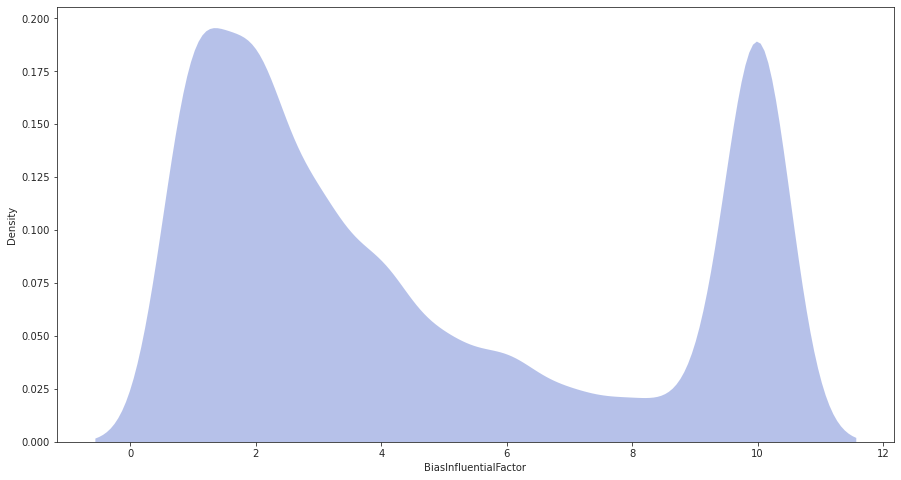

In [20]:
# plot
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(15, 8)
sns.set_theme(style="darkgrid")
sns.kdeplot(data=train_raw, 
            x="BiasInfluentialFactor",       
            fill=True, 
            common_norm=False, 
            palette="crest",
            alpha=.5, 
            linewidth=0)

## Feature Engineering

In [21]:
train = train_raw.copy()
train.head(3)

EmpName  LanguageOfCommunication  ...  BiasInfluentialFactor  FitmentPercent
0     John                        0  ...                    3.0           95.40
1  William                        0  ...                   10.0           67.09
2    James                        0  ...                    2.0           91.26

[3 rows x 21 columns]

### Binning

In [22]:
# Bining
cont_features = [
            'Age',
            'LatestDegreeCGPA',
            'YearsOfExperince',
            'GraduationYear',
            'CurrentCTC',
            'ExpectedCTC',
            'EmpScore',
            'TotalLeavesTaken'
           ]
for cont_feat in cont_features:
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    feature_name = cont_feat + "_" + "bins"
    train[feature_name] = discretizer.fit_transform(train[cont_feat].values.reshape(-1,1)).astype(int)

### Binarization

In [23]:
train['LanguageOfCommunication_binary'] = train['LanguageOfCommunication'].map(lambda x: 1 if x == 2 else 0)
train['gender_binary']                  = train['Gender'].map(lambda x: 1 if x == 2 else 0)
train['GraduatingInstitute_binary']     = train['GraduatingInstitute'].map(lambda x: 1 if x == 3 else 0)
train.head(10)

EmpName  LanguageOfCommunication  ...  gender_binary  GraduatingInstitute_binary
0     John                        0  ...              0                           0
1  William                        0  ...              0                           1
2    James                        0  ...              0                           0
3  Charles                        0  ...              0                           0
4   George                        0  ...              0                           1
5    Frank                        2  ...              0                           0
6   Joseph                        1  ...              0                           0
7   Thomas                        0  ...              0                           0
8    Henry                        0  ...              0                           0
9   Robert                        2  ...              0                           0

[10 rows x 32 columns]

### Create columns that has product of weak features


  'LanguageOfCommunication',

 'Gender',

 'JobProfileIDApplyingFor',

 'HighestDegree',

 'DegreeBranch',

 'GraduatingInstitute',

 'MartialStatus',

 'CurrentDesignation',

 'CurrentCompanyType',

 'DepartmentInCompany'





In [24]:
for col1 in ['Gender',
             'JobProfileIDApplyingFor',
             'HighestDegree',
             'DegreeBranch',
             'GraduatingInstitute',
             'MartialStatus',
             'CurrentDesignation',
             'CurrentCompanyType',
             'DepartmentInCompany'
             ]:
    for col2 in ['Gender',
             'JobProfileIDApplyingFor',
             'HighestDegree',
             'DegreeBranch',
             'GraduatingInstitute',
             'MartialStatus',
             'CurrentDesignation',
             'CurrentCompanyType',
             'DepartmentInCompany'
             ]:
         if col1 == col2:
           pass
         else:
           train[f'{col1}' +'_'+ f'{col2}'] = train[col1] * train[col2]

In [25]:
train

EmpName  ...  DepartmentInCompany_CurrentCompanyType
0         John  ...                                       2
1      William  ...                                       2
2        James  ...                                       2
3      Charles  ...                                       0
4       George  ...                                       1
...        ...  ...                                     ...
13640   Perley  ...                                       0
13641  Randall  ...                                       0
13642  Raphael  ...                                       2
13643     Reed  ...                                       2
13644   Shelby  ...                                       0

[13645 rows x 104 columns]

## Transformation

In [26]:
train_scl = train.copy()
train_scl.drop(['EmpName', 'BiasInfluentialFactor', 'FitmentPercent'], axis=1, inplace=True)
cols = list(train_scl.select_dtypes(include='number').columns)
std_scl = preprocessing.StandardScaler() #instance of preprocessing
train_scl = std_scl.fit_transform(train_scl)
train_scl = pd.DataFrame(train_scl, columns = cols)
train_scl['BiasInfluentialFactor'] = train['BiasInfluentialFactor']
train_scl

LanguageOfCommunication  ...  BiasInfluentialFactor
0                    -0.820906  ...                    3.0
1                    -0.820906  ...                   10.0
2                    -0.820906  ...                    2.0
3                    -0.820906  ...                    2.0
4                    -0.820906  ...                    1.0
...                        ...  ...                    ...
13640                -0.820906  ...                    2.0
13641                 2.151434  ...                   10.0
13642                 0.665264  ...                    4.0
13643                 0.665264  ...                    5.0
13644                -0.820906  ...                    3.0

[13645 rows x 102 columns]

## Test data

In [27]:
test_raw     = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/Test.csv')
#Data encoding
test_raw['LanguageOfCommunication']         = test_raw['LanguageOfCommunication'].replace({'English':0,'Hindi':1, 'Native':2})
test_raw["Gender"]                          = test_raw["Gender"].replace({"Male":0,"Female":1,"Other":2})
test_raw["JobProfileIDApplyingFor"]         = test_raw["JobProfileIDApplyingFor"].apply(lambda x:x[2:])
test_raw["HighestDegree"]                   = test_raw["HighestDegree"].replace({"B.Tech":1, "M.Tech":2, "BCA":3, "MS":4, "Dual M.Tech":5,"Dual MBA":6,"PhD":7,"MCA":8})
test_raw["DegreeBranch"]                    = test_raw["DegreeBranch"].replace({'Computer Science':1,
                                                                                  'Information Technology':2, 
                                                                                  'Artificial Intelligence':3,
                                                                                  'Electrical':4,
                                                                                  'Electronics':5,
                                                                                  'Electrical and Electronics':6})

test_raw["GraduatingInstitute"]             = test_raw["GraduatingInstitute"].apply(lambda x:x[5:])
test_raw["MartialStatus"]                   = test_raw["MartialStatus"].replace({'Married':1,'Single':2})

test_raw["CurrentDesignation"]              = test_raw["CurrentDesignation"].replace({'SDE':1,
                                                                                  'SSE':2, 
                                                                                  'DS':3,
                                                                                  'BA':4,
                                                                                  'EM':5,
                                                                                  'DA':6,
                                                                                  'SEM':7,
                                                                                  'DE':8})
test_raw['CurrentCompanyType']         = test_raw['CurrentCompanyType'].replace({'Startup':0,'Enterprise':1, 'MidSized':2})
test_raw["DepartmentInCompany"]        = test_raw["DepartmentInCompany"].replace({"Engineering":1, 
                                                                                          "Design":2, 
                                                                                          "Customer Success":3, 
                                                                                          "Product":4, 
                                                                                          "Finance":5})

test_raw["LanguageOfCommunication"]      = pd.to_numeric(test_raw["LanguageOfCommunication"])
test_raw["Gender"]                       = pd.to_numeric(test_raw["Gender"])
test_raw["JobProfileIDApplyingFor"]      = pd.to_numeric(test_raw["JobProfileIDApplyingFor"])
test_raw["HighestDegree"]                = pd.to_numeric(test_raw["HighestDegree"])
test_raw["DegreeBranch"]                 = pd.to_numeric(test_raw["DegreeBranch"])
test_raw["GraduatingInstitute"]          = pd.to_numeric(test_raw["GraduatingInstitute"])
test_raw["MartialStatus"]                = pd.to_numeric(test_raw["MartialStatus"])
test_raw["CurrentDesignation"]           = pd.to_numeric(test_raw["CurrentDesignation"])
test_raw["CurrentCompanyType"]           = pd.to_numeric(test_raw["CurrentCompanyType"])
test_raw["DepartmentInCompany"]          = pd.to_numeric(test_raw["DepartmentInCompany"])

# Bining
cont_features = [
            'Age',
            'LatestDegreeCGPA',
            'YearsOfExperince',
            'GraduationYear',
            'CurrentCTC',
            'ExpectedCTC',
            'EmpScore',
            'TotalLeavesTaken'
           ]
for cont_feat in cont_features:
    discretizer = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
    feature_name = cont_feat + "_" + "bins"
    test_raw[feature_name] = discretizer.fit_transform(test_raw[cont_feat].values.reshape(-1,1)).astype(int)

#Binarization
test_raw['LanguageOfCommunication_binary'] = test_raw['LanguageOfCommunication'].map(lambda x: 1 if x == 2 else 0)
test_raw['gender_binary']                  = test_raw['Gender'].map(lambda x: 1 if x == 2 else 0)
test_raw['GraduatingInstitute_binary']     = test_raw['GraduatingInstitute'].map(lambda x: 1 if x == 3 else 0)

# combining features
for col1 in ['Gender',
             'JobProfileIDApplyingFor',
             'HighestDegree',
             'DegreeBranch',
             'GraduatingInstitute',
             'MartialStatus',
             'CurrentDesignation',
             'CurrentCompanyType',
             'DepartmentInCompany'
             ]:
    for col2 in ['Gender',
             'JobProfileIDApplyingFor',
             'HighestDegree',
             'DegreeBranch',
             'GraduatingInstitute',
             'MartialStatus',
             'CurrentDesignation',
             'CurrentCompanyType',
             'DepartmentInCompany'
             ]:
         if col1 == col2:
           pass
         else:
           test_raw[f'{col1}' +'_'+ f'{col2}'] = test_raw[col1] * test_raw[col2]


test_scl = test_raw.copy()
test_scl.drop(['EmpName', 'EmpID'], axis=1, inplace=True)
cols = list(test_scl.select_dtypes(include='number').columns)
std_scl = preprocessing.StandardScaler() #instance of preprocessing
test_scl = std_scl.fit_transform(test_scl)
test_scl = pd.DataFrame(test_scl, columns = cols)
test_scl

LanguageOfCommunication  ...  DepartmentInCompany_CurrentCompanyType
0                    2.154110  ...                                1.677845
1                   -0.828897  ...                               -0.276308
2                   -0.828897  ...                               -0.764846
3                    0.662606  ...                                1.189307
4                    0.662606  ...                               -0.764846
...                       ...  ...                                     ...
8740                -0.828897  ...                               -0.764846
8741                 0.662606  ...                               -0.764846
8742                -0.828897  ...                               -0.764846
8743                -0.828897  ...                                0.212231
8744                 2.154110  ...                               -0.764846

[8745 rows x 101 columns]

## Model Building

###  Spltting the into 80:20 train test size

In [28]:
X = train_scl.iloc[:,:-1]
y = train_scl.iloc[:,-1]

In [29]:
# Spltting the into 80:20 train test size
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(10916, 101)
(2729, 101)
(10916,)
(2729,)


### catboost

In [41]:
from catboost import Pool, CatBoostClassifier

train_data = X_train

eval_data = X_val

cat_features = [0]

train_label = y_train
eval_label = y_val


train_dataset = Pool(data=train_data,
                     label=train_label
                     )

eval_dataset = Pool(data=eval_data,
                    label=eval_label
                    )

# Initialize CatBoostClassifier
cb_model = CatBoostClassifier(iterations=500,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='MultiClass')
# Fit model
cb_model.fit(train_dataset)
# Get predicted classes
cb_preds_class = cb_model.predict(eval_dataset)
# Get predicted probabilities for each class
cb_preds_proba = cb_model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
cb_preds_raw = cb_model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')

0:	learn: 1.9745322	total: 126ms	remaining: 1m 2s
1:	learn: 1.8005970	total: 270ms	remaining: 1m 7s
2:	learn: 1.6564466	total: 400ms	remaining: 1m 6s
3:	learn: 1.5448591	total: 543ms	remaining: 1m 7s
4:	learn: 1.4599782	total: 683ms	remaining: 1m 7s
5:	learn: 1.3854885	total: 823ms	remaining: 1m 7s
6:	learn: 1.3180098	total: 962ms	remaining: 1m 7s
7:	learn: 1.2499772	total: 1.09s	remaining: 1m 7s
8:	learn: 1.2013633	total: 1.24s	remaining: 1m 7s
9:	learn: 1.1608469	total: 1.37s	remaining: 1m 7s
10:	learn: 1.1291399	total: 1.5s	remaining: 1m 6s
11:	learn: 1.0922691	total: 1.64s	remaining: 1m 6s
12:	learn: 1.0642463	total: 1.78s	remaining: 1m 6s
13:	learn: 1.0295289	total: 1.93s	remaining: 1m 7s
14:	learn: 1.0021428	total: 2.07s	remaining: 1m 6s
15:	learn: 0.9800624	total: 2.19s	remaining: 1m 6s
16:	learn: 0.9501067	total: 2.33s	remaining: 1m 6s
17:	learn: 0.9274278	total: 2.46s	remaining: 1m 5s
18:	learn: 0.9017010	total: 2.59s	remaining: 1m 5s
19:	learn: 0.8774461	total: 2.73s	remainin

#### train data prediction analysis

In [42]:
cb_preds_class_train = model.predict(X_train)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_train, cb_preds_class_train)))
print('-+' * 10)
print('Micro Precision: {:.2f}'.format(precision_score(y_train, cb_preds_class_train, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_train, cb_preds_class_train, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_train, cb_preds_class_train, average='micro')))
print('-+' * 30)
print('Macro Precision: {:.2f}'.format(precision_score(y_train, cb_preds_class_train, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_train, cb_preds_class_train, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_train, cb_preds_class_train, average='macro')))
print('-+' * 30)
print('Weighted Precision: {:.2f}'.format(precision_score(y_train, cb_preds_class_train, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_train, cb_preds_class_train, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_train, cb_preds_class_train, average='weighted')))
print('-+' * 30)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train, cb_preds_class_train, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']))


Accuracy: 0.90

-+-+-+-+-+-+-+-+-+-+
Micro Precision: 0.90
Micro Recall: 0.90
Micro F1-score: 0.90

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Macro Precision: 0.92
Macro Recall: 0.88
Macro F1-score: 0.89

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Weighted Precision: 0.90
Weighted Recall: 0.90
Weighted F1-score: 0.90
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Classification Report

              precision    recall  f1-score   support

     Class 1       0.93      0.96      0.95      2321
     Class 2       0.89      1.00      0.94      2053
     Class 3       0.91      0.98      0.95      1224
     Class 4       0.96      0.67      0.79       939
     Class 5       0.87      1.00      0.93       531
     Class 6       0.96      0.99      0.97       479
     Class 7       1.00      0.55      0.71       258
     Class 8       0.87      1.00      0.93       224
     Class 9       0.98      0.87      0.92       209
    Class 10     

In [43]:
cb_preds_class

array([[ 5.],
       [10.],
       [10.],
       ...,
       [ 2.],
       [ 1.],
       [10.]])

#### Validation data prediction analysis

In [44]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_val, cb_preds_class)))
print('-+' * 30)
print('Micro Precision: {:.2f}'.format(precision_score(y_val, cb_preds_class, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_val, cb_preds_class, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_val, cb_preds_class, average='micro')))
print('-+' * 30)
print('Macro Precision: {:.2f}'.format(precision_score(y_val, cb_preds_class, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_val, cb_preds_class, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_val, cb_preds_class, average='macro')))
print('-+' * 30)
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, cb_preds_class, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, cb_preds_class, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_val, cb_preds_class, average='weighted')))
print('-+' * 30)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, cb_preds_class, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']))


Accuracy: 0.79

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Micro Precision: 0.79
Micro Recall: 0.79
Micro F1-score: 0.79

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Macro Precision: 0.70
Macro Recall: 0.68
Macro F1-score: 0.66

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Weighted Precision: 0.77
Weighted Recall: 0.79
Weighted F1-score: 0.77
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Classification Report

              precision    recall  f1-score   support

     Class 1       0.90      0.93      0.91       537
     Class 2       0.85      0.99      0.91       552
     Class 3       0.89      0.95      0.92       337
     Class 4       0.59      0.31      0.41       235
     Class 5       0.75      0.96      0.84       128
     Class 6       0.89      0.96      0.93       103
     Class 7       0.33      0.03      0.05        70
     Class 8       0.57      0.70      0.62        56
     Class 9       0.52      0.

Its still overfitting

#### Receiver Operating Characteristic (ROC) OvO and OvR

In [45]:
from sklearn.metrics import roc_auc_score

macro_roc_auc_ovo = roc_auc_score(y_val, cb_preds_proba, multi_class="ovo",
                                  average="macro")
weighted_roc_auc_ovo = roc_auc_score(y_val, cb_preds_proba, multi_class="ovo",
                                     average="weighted")
macro_roc_auc_ovr = roc_auc_score(y_val, cb_preds_proba, multi_class="ovr",
                                  average="macro")
weighted_roc_auc_ovr = roc_auc_score(y_val, cb_preds_proba, multi_class="ovr",
                                     average="weighted")
print("One-vs-One ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovo, weighted_roc_auc_ovo))
print("--" *30)
print("One-vs-Rest ROC AUC scores:\n{:.6f} (macro),\n{:.6f} "
      "(weighted by prevalence)"
      .format(macro_roc_auc_ovr, weighted_roc_auc_ovr))

One-vs-One ROC AUC scores:
0.952763 (macro),
0.953832 (weighted by prevalence)
------------------------------------------------------------
One-vs-Rest ROC AUC scores:
0.964068 (macro),
0.951309 (weighted by prevalence)


In [35]:
!pip install shap

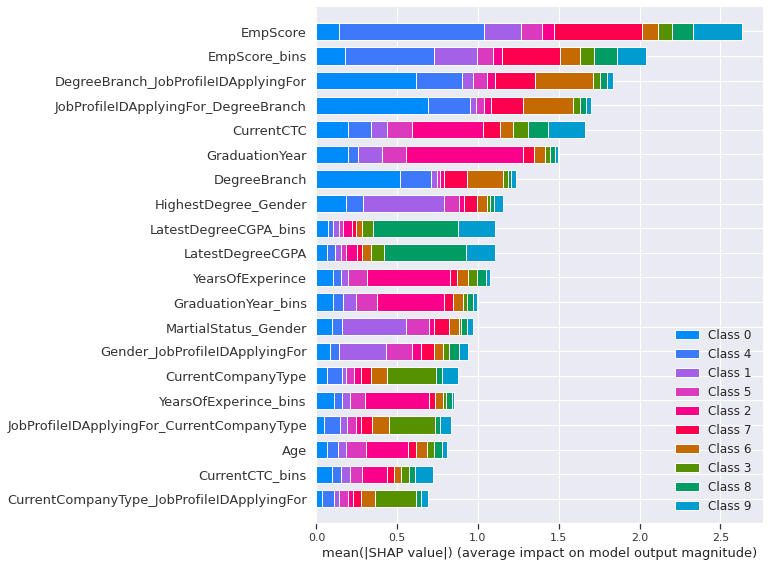

column_name                                    shap_importance
5179         None  [0.10330309015309488, 0.01589216269426031, 0.0...
11761        None  [0.10118628765039298, 0.026069029916414677, 0....
11451        None  [0.10036650813615337, 0.09390916880447424, 0.0...
1088         None  [0.10017031560554941, 0.03906850207054196, 0.0...
2746         None  [0.09860980072326253, 0.0411703328365414, 0.02...
...           ...                                                ...
12303        None  [0.006744157640673612, 0.03192368001076022, 0....
11461        None  [0.006071665067748564, 0.10335235862134959, 0....
9056         None  [0.00518665807660189, 0.1663517292510852, 0.03...
4926         None  [0.004878220109101311, 0.09814470341596843, 0....
1032         None  [0.004067489815375339, 0.02883731379388905, 0....

[13645 rows x 2 columns]

In [46]:
import shap
shap.initjs()

shap_values = shap.TreeExplainer(model=cb_model).shap_values(X)

shap.summary_plot(shap_values, X)


shap_sum = np.abs(shap_values).mean(axis=0)
importance_df = pd.DataFrame([X.columns.tolist(), shap_sum.tolist()]).T
importance_df.columns = ['column_name', 'shap_importance']
importance_df = importance_df.sort_values('shap_importance', ascending=False)
importance_df

### XGboost

In [106]:
# specify model
xgb_model = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softmax', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)
    

# fit the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=7,
              min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.6, verbosity=1)

In [107]:
y_val_pred = xgb_model.predict(X_val)

In [108]:
print("Precision Score : ",precision_score(y_val, y_val_pred, 
                                           pos_label='positive',
                                           average='micro'))
print("Recall Score : ",recall_score(y_val, y_val_pred, 
                                           pos_label='positive',
                                           average='micro'))

Precision Score :  0.7849028948332722
Recall Score :  0.7849028948332722


In [109]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_val, y_val_pred)))

print('Micro Precision: {:.2f}'.format(precision_score(y_val, y_val_pred, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_val, y_val_pred, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_val, y_val_pred, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(y_val, y_val_pred, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_val, y_val_pred, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_val, y_val_pred, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(y_val, y_val_pred, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, y_val_pred, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_val, y_val_pred, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, y_val_pred, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']))


Accuracy: 0.78

Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

Macro Precision: 0.67
Macro Recall: 0.67
Macro F1-score: 0.66

Weighted Precision: 0.76
Weighted Recall: 0.78
Weighted F1-score: 0.77

Classification Report

              precision    recall  f1-score   support

     Class 1       0.89      0.92      0.90       537
     Class 2       0.85      0.98      0.91       552
     Class 3       0.88      0.94      0.91       337
     Class 4       0.58      0.37      0.45       235
     Class 5       0.75      0.93      0.83       128
     Class 6       0.86      0.96      0.91       103
     Class 7       0.18      0.03      0.05        70
     Class 8       0.57      0.66      0.61        56
     Class 9       0.45      0.25      0.32        53
    Class 10       0.67      0.65      0.66       658

    accuracy                           0.78      2729
   macro avg       0.67      0.67      0.66      2729
weighted avg       0.76      0.78      0.77      2729



not better than Catboost

### SMOTE Oversampling for Multi-Class Classification

Class=10, n=2678 (24.533%)
Class=3, n=1224 (11.213%)
Class=2, n=2053 (18.807%)
Class=4, n=939 (8.602%)
Class=6, n=479 (4.388%)
Class=7, n=258 (2.364%)
Class=1, n=2321 (21.262%)
Class=9, n=209 (1.915%)
Class=8, n=224 (2.052%)
Class=5, n=531 (4.864%)


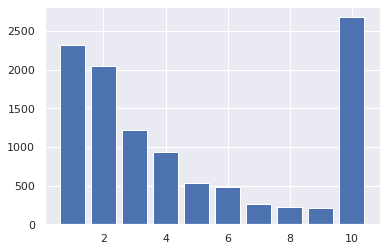

In [119]:
from collections import Counter
# summarize distribution
counter = Counter(y_train)
for k,v in counter.items():
	per = v / len(y_train) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

Class=10, n=2678 (10.000%)
Class=3, n=2678 (10.000%)
Class=2, n=2678 (10.000%)
Class=4, n=2678 (10.000%)
Class=6, n=2678 (10.000%)
Class=7, n=2678 (10.000%)
Class=1, n=2678 (10.000%)
Class=9, n=2678 (10.000%)
Class=8, n=2678 (10.000%)
Class=5, n=2678 (10.000%)


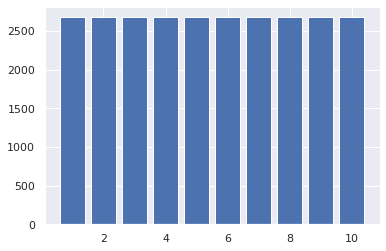

In [121]:
from imblearn.over_sampling import SMOTE
# transform the dataset
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
	per = v / len(y) * 100
	print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
# plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

In [122]:
from catboost import Pool, CatBoostClassifier

train_data = X

eval_data = X_val

cat_features = [0]

train_label = y
eval_label = y_val


train_dataset = Pool(data=train_data,
                     label=train_label
                     )

eval_dataset = Pool(data=eval_data,
                    label=eval_label
                    )

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=500,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='MultiClass')
# Fit model
model.fit(train_dataset)
# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')

0:	learn: 2.0408769	total: 511ms	remaining: 4m 14s
1:	learn: 1.8548833	total: 1.01s	remaining: 4m 11s
2:	learn: 1.7166826	total: 1.48s	remaining: 4m 5s
3:	learn: 1.6128516	total: 1.98s	remaining: 4m 5s
4:	learn: 1.5229308	total: 2.46s	remaining: 4m 3s
5:	learn: 1.4515788	total: 2.96s	remaining: 4m 4s
6:	learn: 1.3880299	total: 3.45s	remaining: 4m 3s
7:	learn: 1.3376066	total: 3.98s	remaining: 4m 4s
8:	learn: 1.2807579	total: 4.48s	remaining: 4m 4s
9:	learn: 1.2069965	total: 4.95s	remaining: 4m 2s
10:	learn: 1.1570266	total: 5.47s	remaining: 4m 3s
11:	learn: 1.1116930	total: 5.98s	remaining: 4m 3s
12:	learn: 1.0728446	total: 6.47s	remaining: 4m 2s
13:	learn: 1.0470413	total: 6.99s	remaining: 4m 2s
14:	learn: 1.0055718	total: 7.47s	remaining: 4m 1s
15:	learn: 0.9830506	total: 7.96s	remaining: 4m
16:	learn: 0.9503778	total: 8.44s	remaining: 3m 59s
17:	learn: 0.9196110	total: 8.95s	remaining: 3m 59s
18:	learn: 0.8976211	total: 9.45s	remaining: 3m 59s
19:	learn: 0.8800435	total: 10s	remaini

In [124]:
preds_class_train = model.predict(X)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y, preds_class_train)))
print('-+' * 10)
print('Micro Precision: {:.2f}'.format(precision_score(y, preds_class_train, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y, preds_class_train, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y, preds_class_train, average='micro')))
print('-+' * 30)
print('Macro Precision: {:.2f}'.format(precision_score(y, preds_class_train, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y, preds_class_train, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y, preds_class_train, average='macro')))
print('-+' * 30)
print('Weighted Precision: {:.2f}'.format(precision_score(y, preds_class_train, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y, preds_class_train, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y, preds_class_train, average='weighted')))
print('-+' * 30)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y, preds_class_train, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']))


Accuracy: 0.95

-+-+-+-+-+-+-+-+-+-+
Micro Precision: 0.95
Micro Recall: 0.95
Micro F1-score: 0.95

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Macro Precision: 0.95
Macro Recall: 0.95
Macro F1-score: 0.95

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Weighted Precision: 0.95
Weighted Recall: 0.95
Weighted F1-score: 0.95
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Classification Report

              precision    recall  f1-score   support

     Class 1       0.94      0.96      0.95      2678
     Class 2       0.91      1.00      0.95      2678
     Class 3       0.95      0.99      0.97      2678
     Class 4       0.96      0.90      0.93      2678
     Class 5       0.95      1.00      0.97      2678
     Class 6       0.99      1.00      0.99      2678
     Class 7       1.00      0.92      0.96      2678
     Class 8       0.96      1.00      0.98      2678
     Class 9       0.98      1.00      0.99      2678
    Class 10     

In [125]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_val, preds_class)))
print('-+' * 30)
print('Micro Precision: {:.2f}'.format(precision_score(y_val, preds_class, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_val, preds_class, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_val, preds_class, average='micro')))
print('-+' * 30)
print('Macro Precision: {:.2f}'.format(precision_score(y_val, preds_class, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_val, preds_class, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_val, preds_class, average='macro')))
print('-+' * 30)
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, preds_class, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, preds_class, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_val, preds_class, average='weighted')))
print('-+' * 30)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, preds_class, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']))


Accuracy: 0.78

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Micro Precision: 0.78
Micro Recall: 0.78
Micro F1-score: 0.78

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Macro Precision: 0.66
Macro Recall: 0.70
Macro F1-score: 0.66

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Weighted Precision: 0.76
Weighted Recall: 0.78
Weighted F1-score: 0.76
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Classification Report

              precision    recall  f1-score   support

     Class 1       0.89      0.93      0.91       537
     Class 2       0.85      0.98      0.91       552
     Class 3       0.88      0.95      0.92       337
     Class 4       0.51      0.34      0.40       235
     Class 5       0.75      0.96      0.84       128
     Class 6       0.87      0.96      0.91       103
     Class 7       0.23      0.04      0.07        70
     Class 8       0.55      0.82      0.66        56
     Class 9       0.35      0.

Not working.. its still overfitting

### ADASYN (Adaptive Synthetic Sampling)

In [127]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0, sampling_strategy='minority')
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)

In [128]:
from catboost import Pool, CatBoostClassifier

train_data = X_train_adasyn

eval_data = X_val

cat_features = [0]

train_label = y_train_adasyn
eval_label = y_val


train_dataset = Pool(data=train_data,
                     label=train_label
                     )

eval_dataset = Pool(data=eval_data,
                    label=eval_label
                    )

# Initialize CatBoostClassifier
model = CatBoostClassifier(iterations=500,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='MultiClass')
# Fit model
model.fit(train_dataset)
# Get predicted classes
preds_class = model.predict(eval_dataset)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(eval_dataset)
# Get predicted RawFormulaVal
preds_raw = model.predict(eval_dataset, 
                          prediction_type='RawFormulaVal')

0:	learn: 1.9775075	total: 343ms	remaining: 2m 51s
1:	learn: 1.7812259	total: 679ms	remaining: 2m 48s
2:	learn: 1.6363988	total: 1s	remaining: 2m 46s
3:	learn: 1.5336083	total: 1.33s	remaining: 2m 44s
4:	learn: 1.4451219	total: 1.65s	remaining: 2m 43s
5:	learn: 1.3728985	total: 2s	remaining: 2m 44s
6:	learn: 1.3120682	total: 2.37s	remaining: 2m 47s
7:	learn: 1.2578338	total: 2.77s	remaining: 2m 50s
8:	learn: 1.2119530	total: 3.12s	remaining: 2m 50s
9:	learn: 1.1627004	total: 3.43s	remaining: 2m 48s
10:	learn: 1.1231349	total: 3.78s	remaining: 2m 47s
11:	learn: 1.0835683	total: 4.11s	remaining: 2m 46s
12:	learn: 1.0555041	total: 4.47s	remaining: 2m 47s
13:	learn: 1.0272538	total: 4.78s	remaining: 2m 46s
14:	learn: 0.9862050	total: 5.13s	remaining: 2m 46s
15:	learn: 0.9613745	total: 5.47s	remaining: 2m 45s
16:	learn: 0.9399080	total: 5.8s	remaining: 2m 44s
17:	learn: 0.9136316	total: 6.11s	remaining: 2m 43s
18:	learn: 0.8973915	total: 6.43s	remaining: 2m 42s
19:	learn: 0.8734472	total: 6

In [130]:
preds_class_train = model.predict(X_train_adasyn)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_train_adasyn, preds_class_train)))
print('-+' * 10)
print('Micro Precision: {:.2f}'.format(precision_score(y_train_adasyn, preds_class_train, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_train_adasyn, preds_class_train, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_train_adasyn, preds_class_train, average='micro')))
print('-+' * 30)
print('Macro Precision: {:.2f}'.format(precision_score(y_train_adasyn, preds_class_train, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_train_adasyn, preds_class_train, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_train_adasyn, preds_class_train, average='macro')))
print('-+' * 30)
print('Weighted Precision: {:.2f}'.format(precision_score(y_train_adasyn, preds_class_train, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_train_adasyn, preds_class_train, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_train_adasyn, preds_class_train, average='weighted')))
print('-+' * 30)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_train_adasyn, preds_class_train, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']))


Accuracy: 0.92

-+-+-+-+-+-+-+-+-+-+
Micro Precision: 0.92
Micro Recall: 0.92
Micro F1-score: 0.92

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Macro Precision: 0.92
Macro Recall: 0.88
Macro F1-score: 0.89

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Weighted Precision: 0.92
Weighted Recall: 0.92
Weighted F1-score: 0.91
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Classification Report

              precision    recall  f1-score   support

     Class 1       0.93      0.95      0.94      2321
     Class 2       0.89      1.00      0.94      2053
     Class 3       0.91      0.98      0.95      1224
     Class 4       0.97      0.65      0.77       939
     Class 5       0.86      1.00      0.92       531
     Class 6       0.96      0.99      0.97       479
     Class 7       1.00      0.49      0.66       258
     Class 8       0.86      0.98      0.92       224
     Class 9       0.98      1.00      0.99      2597
    Class 10     

In [131]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_val, preds_class)))
print('-+' * 30)
print('Micro Precision: {:.2f}'.format(precision_score(y_val, preds_class, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(y_val, preds_class, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(y_val, preds_class, average='micro')))
print('-+' * 30)
print('Macro Precision: {:.2f}'.format(precision_score(y_val, preds_class, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(y_val, preds_class, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(y_val, preds_class, average='macro')))
print('-+' * 30)
print('Weighted Precision: {:.2f}'.format(precision_score(y_val, preds_class, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(y_val, preds_class, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(y_val, preds_class, average='weighted')))
print('-+' * 30)
from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_val, preds_class, target_names=['Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9', 'Class 10']))


Accuracy: 0.79

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Micro Precision: 0.79
Micro Recall: 0.79
Micro F1-score: 0.79

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Macro Precision: 0.65
Macro Recall: 0.69
Macro F1-score: 0.66

-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+
Weighted Precision: 0.77
Weighted Recall: 0.79
Weighted F1-score: 0.77
-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+-+

Classification Report

              precision    recall  f1-score   support

     Class 1       0.90      0.93      0.91       537
     Class 2       0.85      0.98      0.91       552
     Class 3       0.89      0.95      0.92       337
     Class 4       0.65      0.29      0.40       235
     Class 5       0.75      0.97      0.84       128
     Class 6       0.89      0.97      0.93       103
     Class 7       0.00      0.00      0.00        70
     Class 8       0.56      0.70      0.62        56
     Class 9       0.34      0.

still overfiting..

# Getting prepare for Regression

## Loading data into pandas dataframe and print details of data

In [167]:
train_raw   = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/Train.csv')
test_raw    = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/Test.csv')
sub         = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/sample submission.csv')

## Adding BiasInfluentialFactor in the test data

In [168]:
test_preds = cb_model.predict(test_scl)
test_preds = np.squeeze(test_preds) 
# submission = pd.DataFrame({'EmpID':test_raw['EmpID'],'BiasInfluentialFactor':test_preds})
# submission["BiasInfluentialFactor"] = submission["BiasInfluentialFactor"].replace({1.:'DegreeBranch',
#                                                                                   2.:'Gender',
#                                                                                   3.:'YearsOfExperince',
#                                                                                   4.:'CurrentCompanyType',
#                                                                                   5.:'EmpScore',
#                                                                                   6.:'HighestDegree',
#                                                                                   7.:'Ethinicity',
#                                                                                   8.:'MartialStatus',
#                                                                                   9.:'LatestDegreeCGPA',
#                                                                                   10.:'NaN'})
# submission.to_csv('1st_cb_try.csv', index=False)

In [169]:
test_raw["BiasInfluentialFactor"] = test_preds
test_raw.head(3)

EmpID  EmpName  ... TotalLeavesTaken  BiasInfluentialFactor
0   5664     Theo  ...               18                    1.0
1  23568   Vernie  ...                8                    1.0
2  21490  Wendell  ...               18                    8.0

[3 rows x 21 columns]

In [170]:
#descriptive statistics summary
train_raw['FitmentPercent'].describe()

count    13645.000000
mean        75.880093
std         14.894207
min         33.530000
25%         68.720000
50%         78.110000
75%         87.990000
max         95.500000
Name: FitmentPercent, dtype: float64

## Data Encoding and Imputing missing values 

In [171]:
train_raw   = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/Train.csv')
#Data encoding
train_raw['LanguageOfCommunication']         = train_raw['LanguageOfCommunication'].replace({'English':0,'Hindi':1, 'Native':2})
train_raw["Gender"]                          = train_raw["Gender"].replace({"Male":0,"Female":1,"Other":2})
train_raw["JobProfileIDApplyingFor"]         = train_raw["JobProfileIDApplyingFor"].apply(lambda x:x[2:])
train_raw["HighestDegree"]                   = train_raw["HighestDegree"].replace({"B.Tech":1, "M.Tech":2, "BCA":3, "MS":4, "Dual M.Tech":5,"Dual MBA":6,"PhD":7,"MCA":8})
train_raw["DegreeBranch"]                    = train_raw["DegreeBranch"].replace({'Computer Science':1,
                                                                                  'Information Technology':2, 
                                                                                  'Artificial Intelligence':3,
                                                                                  'Electrical':4,
                                                                                  'Electronics':5,
                                                                                  'Electrical and Electronics':6})

train_raw["GraduatingInstitute"]             = train_raw["GraduatingInstitute"].apply(lambda x:x[5:])
train_raw["MartialStatus"]                   = train_raw["MartialStatus"].replace({'Married':1,'Single':2})

train_raw["CurrentDesignation"]              = train_raw["CurrentDesignation"].replace({'SDE':1,
                                                                                  'SSE':2, 
                                                                                  'DS':3,
                                                                                  'BA':4,
                                                                                  'EM':5,
                                                                                  'DA':6,
                                                                                  'SEM':7,
                                                                                  'DE':8})
train_raw['CurrentCompanyType']         = train_raw['CurrentCompanyType'].replace({'Startup':0,'Enterprise':1, 'MidSized':2})
train_raw["DepartmentInCompany"]        = train_raw["DepartmentInCompany"].replace({"Engineering":1, 
                                                                                          "Design":2, 
                                                                                          "Customer Success":3, 
                                                                                          "Product":4, 
                                                                                          "Finance":5})
train_raw["BiasInfluentialFactor"]      = train_raw["BiasInfluentialFactor"].replace({'DegreeBranch':1,
                                                                                  'Gender':2, 
                                                                                  'YearsOfExperince':3,
                                                                                  'CurrentCompanyType':4,
                                                                                  'EmpScore':5,
                                                                                  'HighestDegree':6,
                                                                                  'Ethinicity':7,
                                                                                  'MartialStatus':8,
                                                                                  'LatestDegreeCGPA':9})
#imputing BiasInfluentialFactor Nan values with the new value 3
train_raw["BiasInfluentialFactor"] = train_raw["BiasInfluentialFactor"].fillna(10)
train_raw

EmpID  EmpName  ...  BiasInfluentialFactor  FitmentPercent
0      11041     John  ...                    3.0           95.40
1      15079  William  ...                   10.0           67.09
2      18638    James  ...                    2.0           91.26
3       3941  Charles  ...                    2.0           72.29
4       5936   George  ...                    1.0           86.34
...      ...      ...  ...                    ...             ...
13640  19504   Perley  ...                    2.0           93.65
13641  17071  Randall  ...                   10.0           52.90
13642   6659  Raphael  ...                    4.0           61.46
13643   5986     Reed  ...                    5.0           93.64
13644   4668   Shelby  ...                    3.0           93.52

[13645 rows x 22 columns]

## EDA (Exploratory data analysis)

In [172]:
train_raw.drop(['EmpID'], axis=1, inplace=True) #dropping id col
features                = train_raw.columns.values
categorical_features    = train_raw.select_dtypes(include='object').columns.tolist() #list of only cat features excluding empname

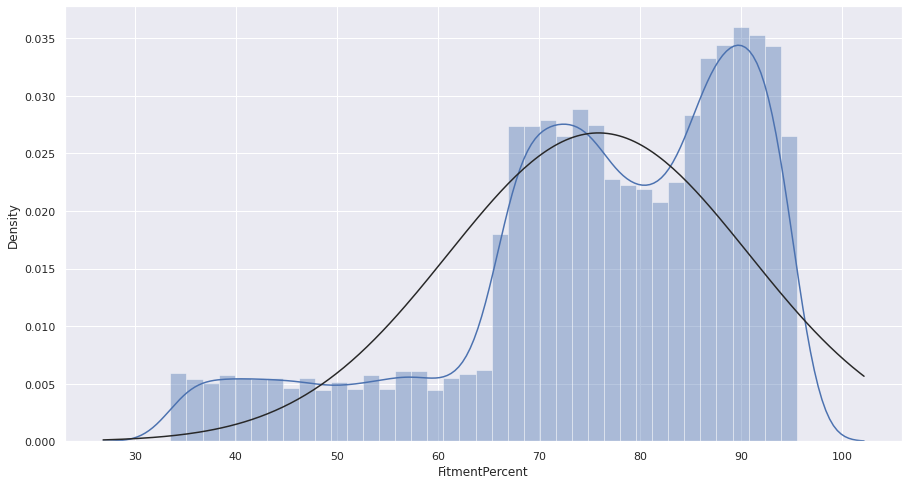

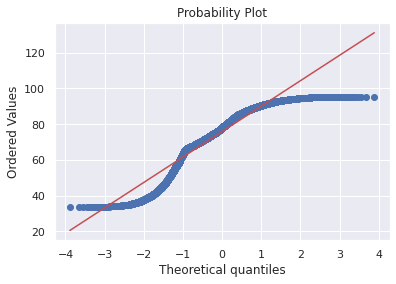

In [173]:
from scipy import stats
from scipy.stats import norm
plt.figure(figsize=(15,8))
#histogram and normal probability plot
sns.distplot(train_raw['FitmentPercent'], fit=norm);
fig = plt.figure()
res = stats.probplot(train_raw['FitmentPercent'], plot=plt)

In [174]:
#skewness and kurtosis
print("Skewness: %f" % train_raw['FitmentPercent'].skew())
print("Kurtosis: %f" % train_raw['FitmentPercent'].kurt())

Skewness: -0.966175
Kurtosis: 0.360947


(-0.5, 9.5, 0.0, 100.0)

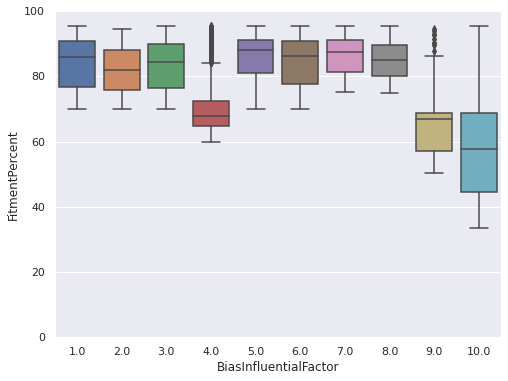

In [175]:
#box plot overallqual/saleprice
var = 'BiasInfluentialFactor'
data = pd.concat([train_raw['FitmentPercent'], train_raw[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="FitmentPercent", data=data)
fig.axis(ymin=0, ymax=100)

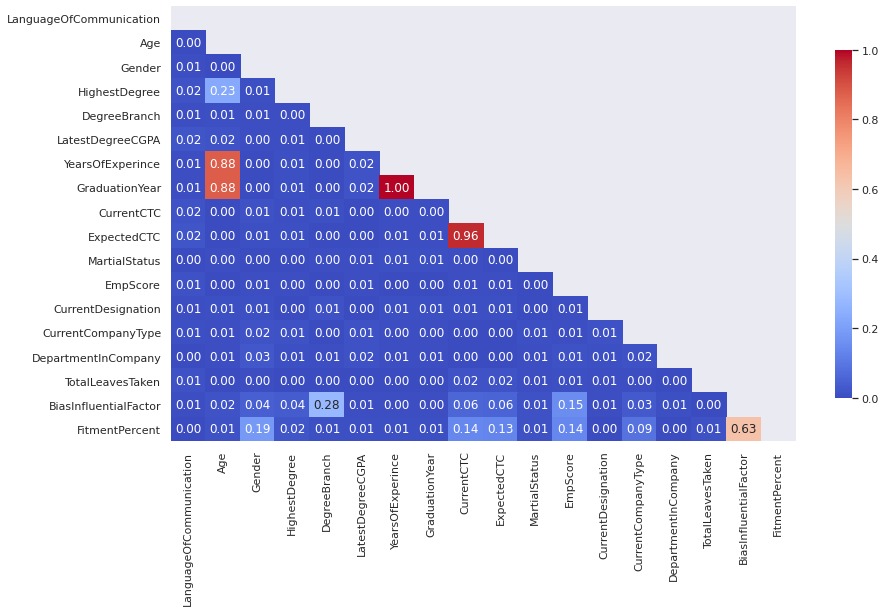

In [176]:
corr = train_raw.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(14, 8))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)
# yticks
plt.yticks(rotation=0)
plt.show()

drop Age, graduation year, current ctc they are correlated features

In [177]:
train_raw.drop(["Age",'GraduationYear','CurrentCTC'], axis = 1, inplace = True)

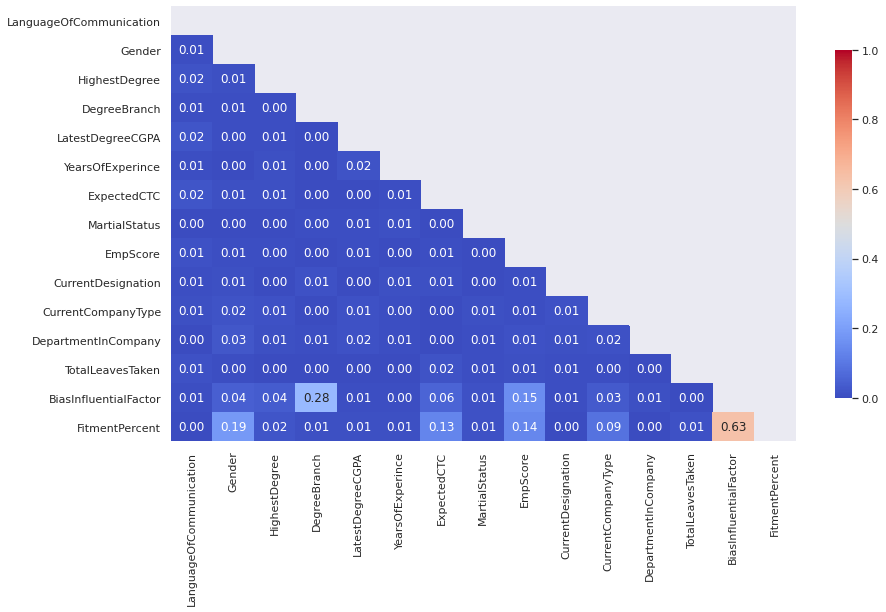

In [178]:
corr = train_raw.corr().abs()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

fig, ax = plt.subplots(figsize=(14, 8))

# plot heatmap
sns.heatmap(corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, vmin=0, vmax=1)
# yticks
plt.yticks(rotation=0)
plt.show()

Nice

In [179]:
#standardizing data
FitmentPercent_scaled = StandardScaler().fit_transform(train_raw['FitmentPercent'][:,np.newaxis]);
low_range = FitmentPercent_scaled[FitmentPercent_scaled[:,0].argsort()][:10]
high_range= FitmentPercent_scaled[FitmentPercent_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

outer range (low) of the distribution:
[[-2.84349779]
 [-2.84349779]
 [-2.84014066]
 [-2.84014066]
 [-2.8387978 ]
 [-2.83745495]
 [-2.83745495]
 [-2.83544067]
 [-2.83476925]
 [-2.83409782]]

outer range (high) of the distribution:
[[1.31666126]
 [1.31666126]
 [1.31666126]
 [1.31666126]
 [1.31666126]
 [1.31666126]
 [1.31733269]
 [1.31733269]
 [1.31733269]
 [1.31733269]]


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


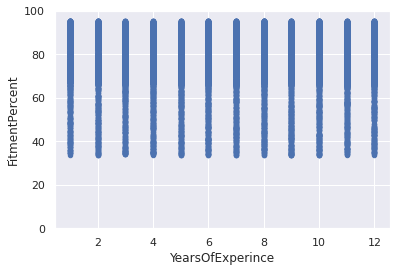

In [180]:
#bivariate analysis FitmentPercent/YearsOfExperince
var = 'YearsOfExperince'
data = pd.concat([train_raw['FitmentPercent'], train_raw[var]], axis=1)
data.plot.scatter(x=var, y='FitmentPercent', ylim=(0,100));

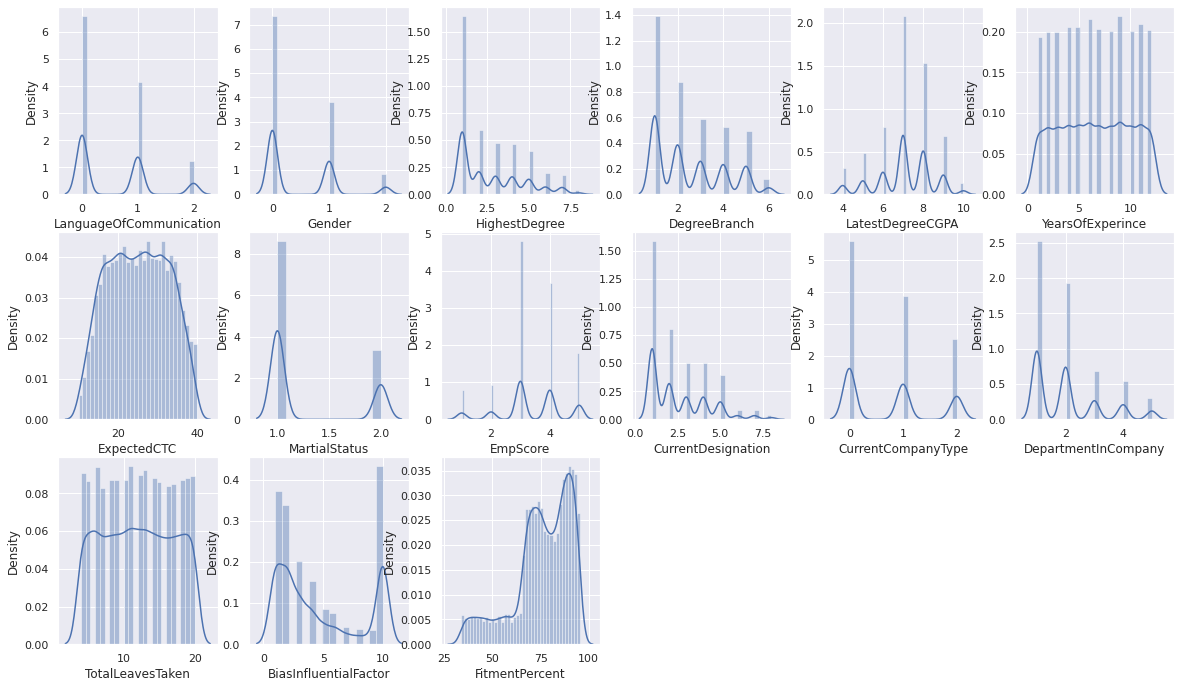

In [181]:
# plot the histogram of a variable from the dataset to see the skewness
var = train_raw.select_dtypes(include=np.number).columns.tolist()  #list of only num features

plt.figure(figsize=(20,20))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(train_raw[col])

plt.show()

In [182]:
#data transformation
train_raw['YearsOfExperince']  = np.log(train_raw['YearsOfExperince'])
train_raw['ExpectedCTC']       = np.log(train_raw['ExpectedCTC'])
train_raw['TotalLeavesTaken']  = np.log(train_raw['TotalLeavesTaken'])

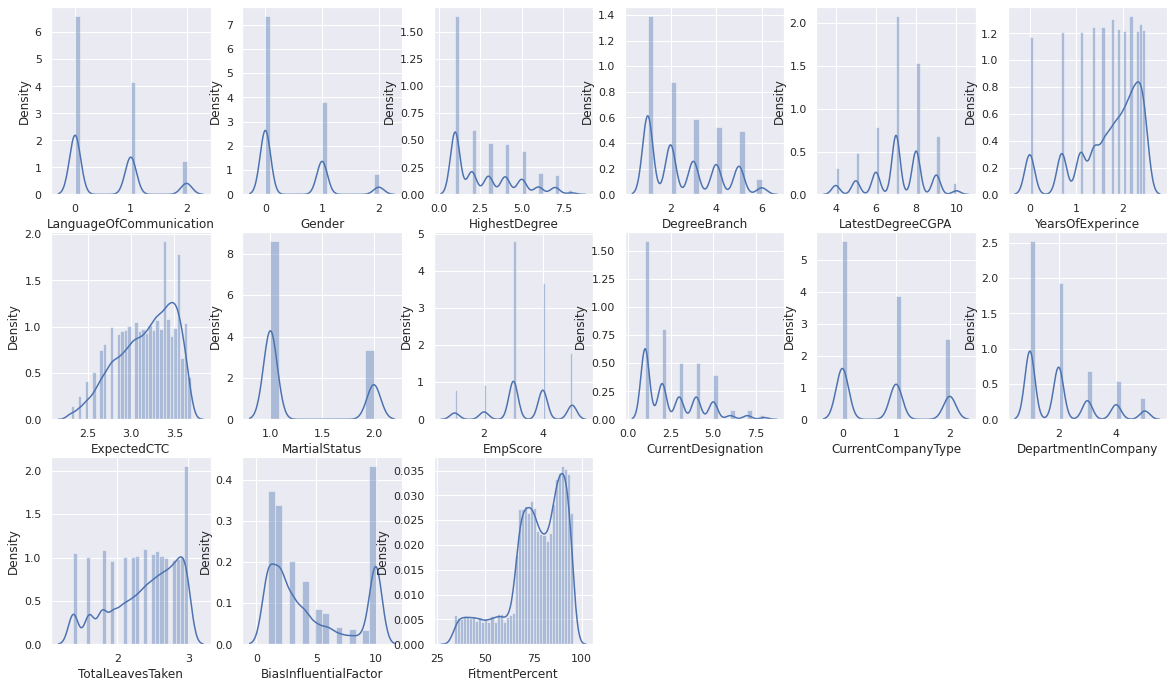

In [183]:
# plot the histogram of a variable from the dataset to see the skewness
var = train_raw.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(20,20))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(train_raw[col])

plt.show()

In [184]:
train_raw

EmpName  LanguageOfCommunication  ...  BiasInfluentialFactor FitmentPercent
0         John                        0  ...                    3.0          95.40
1      William                        0  ...                   10.0          67.09
2        James                        0  ...                    2.0          91.26
3      Charles                        0  ...                    2.0          72.29
4       George                        0  ...                    1.0          86.34
...        ...                      ...  ...                    ...            ...
13640   Perley                        0  ...                    2.0          93.65
13641  Randall                        2  ...                   10.0          52.90
13642  Raphael                        1  ...                    4.0          61.46
13643     Reed                        1  ...                    5.0          93.64
13644   Shelby                        0  ...                    3.0          93.52

[13645 rows x 18 columns]

In [185]:
train_raw.drop("EmpName", axis = 1, inplace=True)

## Test data

In [202]:
test_raw     = pd.read_csv('/content/drive/MyDrive/amazon_may-june_2021/Test.csv')
#Data encoding
test_raw['LanguageOfCommunication']         = test_raw['LanguageOfCommunication'].replace({'English':0,'Hindi':1, 'Native':2})
test_raw["Gender"]                          = test_raw["Gender"].replace({"Male":0,"Female":1,"Other":2})
test_raw["JobProfileIDApplyingFor"]         = test_raw["JobProfileIDApplyingFor"].apply(lambda x:x[2:])
test_raw["HighestDegree"]                   = test_raw["HighestDegree"].replace({"B.Tech":1, "M.Tech":2, "BCA":3, "MS":4, "Dual M.Tech":5,"Dual MBA":6,"PhD":7,"MCA":8})
test_raw["DegreeBranch"]                    = test_raw["DegreeBranch"].replace({'Computer Science':1,
                                                                                  'Information Technology':2, 
                                                                                  'Artificial Intelligence':3,
                                                                                  'Electrical':4,
                                                                                  'Electronics':5,
                                                                                  'Electrical and Electronics':6})

test_raw["GraduatingInstitute"]             = test_raw["GraduatingInstitute"].apply(lambda x:x[5:])
test_raw["MartialStatus"]                   = test_raw["MartialStatus"].replace({'Married':1,'Single':2})

test_raw["CurrentDesignation"]              = test_raw["CurrentDesignation"].replace({'SDE':1,
                                                                                  'SSE':2, 
                                                                                  'DS':3,
                                                                                  'BA':4,
                                                                                  'EM':5,
                                                                                  'DA':6,
                                                                                  'SEM':7,
                                                                                  'DE':8})
test_raw['CurrentCompanyType']         = test_raw['CurrentCompanyType'].replace({'Startup':0,'Enterprise':1, 'MidSized':2})
test_raw["DepartmentInCompany"]        = test_raw["DepartmentInCompany"].replace({"Engineering":1, 
                                                                                          "Design":2, 
                                                                                          "Customer Success":3, 
                                                                                          "Product":4, 
                                                                                          "Finance":5})

test_raw.drop(["Age",'GraduationYear','CurrentCTC'], axis = 1, inplace = True)
#data transformation
train_raw['YearsOfExperince']  = np.log(train_raw['YearsOfExperince'])
train_raw['ExpectedCTC']       = np.log(train_raw['ExpectedCTC'])
train_raw['TotalLeavesTaken']  = np.log(train_raw['TotalLeavesTaken'])
train_raw['FitmentPercent']    = np.log(train_raw['FitmentPercent'])


test_raw["LanguageOfCommunication"]      = pd.to_numeric(test_raw["LanguageOfCommunication"])
test_raw["Gender"]                       = pd.to_numeric(test_raw["Gender"])
test_raw["JobProfileIDApplyingFor"]      = pd.to_numeric(test_raw["JobProfileIDApplyingFor"])
test_raw["HighestDegree"]                = pd.to_numeric(test_raw["HighestDegree"])
test_raw["DegreeBranch"]                 = pd.to_numeric(test_raw["DegreeBranch"])
test_raw["GraduatingInstitute"]          = pd.to_numeric(test_raw["GraduatingInstitute"])
test_raw["MartialStatus"]                = pd.to_numeric(test_raw["MartialStatus"])
test_raw["CurrentDesignation"]           = pd.to_numeric(test_raw["CurrentDesignation"])
test_raw["CurrentCompanyType"]           = pd.to_numeric(test_raw["CurrentCompanyType"])
test_raw["DepartmentInCompany"]          = pd.to_numeric(test_raw["DepartmentInCompany"])
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling the train data
test_scl = test_raw.copy()
test_scl[["JobProfileIDApplyingFor"]] = scaler.fit_transform(test_raw[["JobProfileIDApplyingFor"]])
test_scl[["JobProfileIDApplyingFor"]] = scaler.fit_transform(test_raw[["JobProfileIDApplyingFor"]])
test_scl["BiasInfluentialFactor"] = test_preds
test_scl.drop(['EmpName', 'EmpID'], axis=1, inplace=True)
test_scl

LanguageOfCommunication  Gender  ...  TotalLeavesTaken  BiasInfluentialFactor
0                           2       0  ...                18                    1.0
1                           0       0  ...                 8                    1.0
2                           0       0  ...                18                    8.0
3                           1       0  ...                17                    4.0
4                           1       1  ...                 9                    2.0
...                       ...     ...  ...               ...                    ...
8740                        0       1  ...                10                    2.0
8741                        1       0  ...                19                    6.0
8742                        0       0  ...                12                    1.0
8743                        0       0  ...                10                   10.0
8744                        2       2  ...                10                   10.0

[8745 rows x 16 columns]

## model building

In [186]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error 
from sklearn.tree import DecisionTreeRegressor

import xgboost as xgb

In [187]:
train_raw["LanguageOfCommunication"]      = pd.to_numeric(train_raw["LanguageOfCommunication"])
train_raw["Gender"]                       = pd.to_numeric(train_raw["Gender"])
train_raw["JobProfileIDApplyingFor"]      = pd.to_numeric(train_raw["JobProfileIDApplyingFor"])
train_raw["HighestDegree"]                = pd.to_numeric(train_raw["HighestDegree"])
train_raw["DegreeBranch"]                 = pd.to_numeric(train_raw["DegreeBranch"])
train_raw["GraduatingInstitute"]          = pd.to_numeric(train_raw["GraduatingInstitute"])
train_raw["MartialStatus"]                = pd.to_numeric(train_raw["MartialStatus"])
train_raw["CurrentDesignation"]           = pd.to_numeric(train_raw["CurrentDesignation"])
train_raw["CurrentCompanyType"]           = pd.to_numeric(train_raw["CurrentCompanyType"])
train_raw["DepartmentInCompany"]          = pd.to_numeric(train_raw["DepartmentInCompany"])
train_raw["BiasInfluentialFactor"]        = pd.to_numeric(train_raw["BiasInfluentialFactor"])


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Scaling the train data
train_raw[["JobProfileIDApplyingFor"]] = scaler.fit_transform(train_raw[["JobProfileIDApplyingFor"]])

In [189]:
X = train_raw.iloc[:,:-1]
y = train_raw.iloc[:,-1]

# Spltting the into 80:20 train test size
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state = 42)

print(X_train.shape)
print(X_val.shape)
print(y_train.shape)
print(y_val.shape)

(10916, 16)
(2729, 16)
(10916,)
(2729,)


### XgbRegressor

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=0)
Training score:  0.7815969304745428
Mean cross-validation score: 0.77
K-fold CV average score: 0.77
MSE:  50.96666645154491
RMSE:  7.13909423187178


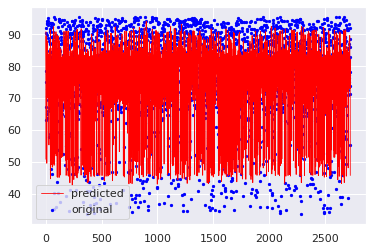

In [190]:
xgbr = xgb.XGBRegressor(verbosity=0)
print(xgbr)

xgbr.fit(X_train, y_train) 

score = xgbr.score(X_train, y_train)   

print("Training score: ", score)  

# - cross validataion 
scores = cross_val_score(xgbr, X_train, y_train, cv=5)
print("Mean cross-validation score: %.2f" % scores.mean())

kfold = KFold(n_splits=10, shuffle=True)
kf_cv_scores = cross_val_score(xgbr, X_train, y_train, cv=kfold )
print("K-fold CV average score: %.2f" % kf_cv_scores.mean()) 

ypred = xgbr.predict(X_val)
mse = mean_squared_error(y_val, ypred)
print("MSE: " , mse)
print("RMSE: ",  (mse**(1/2.0)))


x_ax = range(len(y_val))
plt.scatter(x_ax, y_val, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### XGB regressor GridCV

In [205]:
sub

EmpID BiasInfluentialFactor  FitmentPercent
0   5664         MaritalStatus           25.14
1  23568          DegreeBranch           91.44
2  21490         MartialStatus           76.92
3   8363         HighestDegree           77.92
4   6165                Gender           85.64
5  17679                   NaN           41.23
6   9715                   NaN           50.00

In [191]:
# Various hyper-parameters to tune
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,
         y_train)

print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  27 out of  27 | elapsed:  2.0min finished


0.7849896921869931
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [192]:
# cv results
cv_results = pd.DataFrame(xgb_grid.cv_results_)
cv_results

mean_fit_time  std_fit_time  ...  std_test_score  rank_test_score
0      16.311003      0.605150  ...        0.003457                1
1      20.433717      0.819772  ...        0.004083                2
2      25.129632      0.455024  ...        0.004955                3
3      16.892508      0.188047  ...        0.005128                4
4      20.877363      0.325364  ...        0.004546                5
5      25.669852      1.143629  ...        0.005607                7
6      17.136858      0.586375  ...        0.004947                6
7      20.976390      0.665403  ...        0.006124                8
8      17.035831      4.352879  ...        0.005933                9

[9 rows x 20 columns]

In [193]:
# Printing the optimal score and hyperparameters
print("Best score : ", xgb_grid.best_score_)
print(xgb_grid.best_estimator_)

Best score :  0.7849896921869931
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)


In [196]:
# fit model on training data
xgb_model = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, gamma=0,
             importance_type='gain', learning_rate=0.03, max_delta_step=0,
             max_depth=5, min_child_weight=4, missing=None, n_estimators=500,
             n_jobs=1, nthread=4, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None, silent=1,
             subsample=0.7, verbosity=1)

In [197]:
y_val_pred = xgb_model.predict(X_val)
mse = mean_squared_error(y_val, y_val_pred)
print("MSE: " , mse)
print("RMSE: ",  (mse**(1/2.0)))

MSE:  47.136733999084626
RMSE:  6.865619709762886


In [207]:
test_preds_xgbcv = xgb_model.predict(test_scl)
test_preds_xgbcv = np.squeeze(test_preds_xgbcv) 
submission_xgbcv = pd.DataFrame({'EmpID':test_raw['EmpID'],
                                 'BiasInfluentialFactor':test_preds, 
                                 'FitmentPercent':test_preds_xgbcv})
submission_xgbcv["BiasInfluentialFactor"] = submission_xgbcv["BiasInfluentialFactor"].replace({1.:'DegreeBranch',
                                                                                  2.:'Gender',
                                                                                  3.:'YearsOfExperince',
                                                                                  4.:'CurrentCompanyType',
                                                                                  5.:'EmpScore',
                                                                                  6.:'HighestDegree',
                                                                                  7.:'Ethinicity',
                                                                                  8.:'MartialStatus',
                                                                                  9.:'LatestDegreeCGPA',
                                                                                  10.:'NaN'})

decimals = 2    
submission_xgbcv['FitmentPercent'] = submission_xgbcv['FitmentPercent'].apply(lambda x: round(x, decimals))
submission_xgbcv.to_csv('cb_xbcv.csv', index=False)
submission_xgbcv

EmpID BiasInfluentialFactor  FitmentPercent
0      5664          DegreeBranch           88.68
1     23568          DegreeBranch           88.36
2     21490         MartialStatus           85.44
3      8363    CurrentCompanyType           85.72
4      6165                Gender           80.50
...     ...                   ...             ...
8740  14758                Gender           82.45
8741  23544         HighestDegree           89.92
8742  16175          DegreeBranch           90.48
8743  18458                   NaN           49.86
8744  10036                   NaN           45.49

[8745 rows x 3 columns]

### Catboost Regressor

In [208]:
import numpy as np
from catboost import Pool, CatBoostRegressor
# initialize data
train_data = X_train

eval_data = X_val

cat_features = [0]

train_label = y_train

eval_label = y_val


train_dataset = Pool(data=train_data,
                     label=train_label
                     )

eval_dataset = Pool(data=eval_data,
                    label=eval_label
                    )

# specify the training parameters 
cb_reg_model = CatBoostRegressor(iterations=500, 
                          depth=6, 
                          learning_rate=0.1, 
                          loss_function='RMSE')
#train the model
cb_reg_model.fit(train_dataset)
# make the prediction using the resulting model
reg_preds = cb_reg_model.predict(eval_dataset)
print(reg_preds)

0:	learn: 13.9517790	total: 8.61ms	remaining: 4.3s
1:	learn: 13.0595656	total: 11.4ms	remaining: 2.84s
2:	learn: 12.2729511	total: 14.5ms	remaining: 2.4s
3:	learn: 11.6154816	total: 17.3ms	remaining: 2.15s
4:	learn: 10.9798951	total: 20.2ms	remaining: 2s
5:	learn: 10.4143277	total: 23.1ms	remaining: 1.9s
6:	learn: 9.9451181	total: 25.9ms	remaining: 1.82s
7:	learn: 9.5182927	total: 28.8ms	remaining: 1.77s
8:	learn: 9.1616526	total: 31.6ms	remaining: 1.72s
9:	learn: 8.8502651	total: 34.5ms	remaining: 1.69s
10:	learn: 8.5894499	total: 38.8ms	remaining: 1.72s
11:	learn: 8.3526089	total: 41.8ms	remaining: 1.7s
12:	learn: 8.1510504	total: 44.8ms	remaining: 1.68s
13:	learn: 7.9845762	total: 47.6ms	remaining: 1.65s
14:	learn: 7.8156519	total: 50.9ms	remaining: 1.65s
15:	learn: 7.7058064	total: 56.4ms	remaining: 1.71s
16:	learn: 7.5720931	total: 59.5ms	remaining: 1.69s
17:	learn: 7.5005750	total: 62.6ms	remaining: 1.68s
18:	learn: 7.4219923	total: 65.6ms	remaining: 1.66s
19:	learn: 7.3642835	to

In [209]:
mse = mean_squared_error(y_val, reg_preds)
print("MSE: " , mse)
print("RMSE: ",  (mse**(1/2.0)))

MSE:  47.974904633286435
RMSE:  6.92639189140251


In [210]:
test_preds_cbreg = np.squeeze(cb_reg_model.predict(test_scl))
# test_preds_cbreg = np.squeeze(test_preds_cbreg) 
submission_cbreg = pd.DataFrame({'EmpID':test_raw['EmpID'],
                                 'BiasInfluentialFactor':test_preds, 
                                 'FitmentPercent':test_preds_cbreg})
submission_cbreg["BiasInfluentialFactor"] = submission_cbreg["BiasInfluentialFactor"].replace({1.:'DegreeBranch',
                                                                                  2.:'Gender',
                                                                                  3.:'YearsOfExperince',
                                                                                  4.:'CurrentCompanyType',
                                                                                  5.:'EmpScore',
                                                                                  6.:'HighestDegree',
                                                                                  7.:'Ethinicity',
                                                                                  8.:'MartialStatus',
                                                                                  9.:'LatestDegreeCGPA',
                                                                                  10.:'NaN'})

decimals = 2    
submission_cbreg['FitmentPercent'] = submission_cbreg['FitmentPercent'].apply(lambda x: round(x, decimals))
submission_cbreg.to_csv('cb_cb.csv', index=False)
submission_cbreg

EmpID BiasInfluentialFactor  FitmentPercent
0      5664          DegreeBranch           89.31
1     23568          DegreeBranch           92.14
2     21490         MartialStatus           85.00
3      8363    CurrentCompanyType           81.89
4      6165                Gender           83.91
...     ...                   ...             ...
8740  14758                Gender           84.26
8741  23544         HighestDegree           87.54
8742  16175          DegreeBranch           92.75
8743  18458                   NaN           48.98
8744  10036                   NaN           46.64

[8745 rows x 3 columns]